In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import numpy as np


# STR

**Ejemplo de aplicación de librerias**

Representaciones de Haar wavelet sobre patrones de repetición

Representacion numerica de una secuiencia

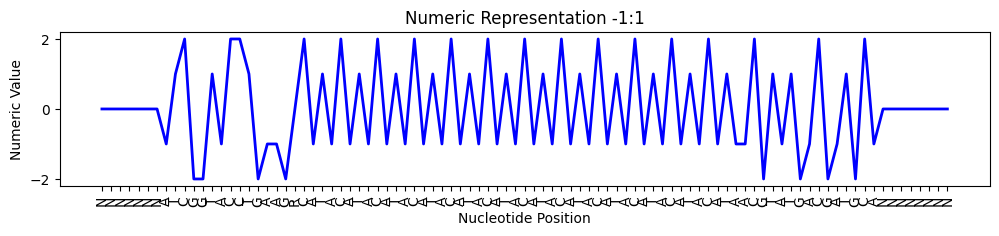

In [3]:

def numeric_encode(short_read_line):
    mapping = {'G': -2, 'A': -1, 'T': 1, 'C': 2, 'N': 0}
    return [mapping.get(base, 0) for base in short_read_line]

# Example DNA sequence
sequence= 'NNNNNNNATCGGTACCTGAAGRCATACATACATACATACATACATACATACATACATACATACATACATAACGTATGACGATGCANNNNNNNN'
#two800_df_w.iloc[8,3]
dna_sequence = numeric_encode(sequence)

# Plot the numeric representation of the DNA sequence
plt.figure(figsize=(12, 2))
plt.plot(range(len(dna_sequence)), dna_sequence, color='blue', linewidth=2)
plt.yticks([-2, 0, 2])  # Set y-axis ticks to -2, 0, and 2
plt.xticks(range(len(dna_sequence)), sequence, rotation=90)
plt.title('Numeric Representation -1:1')
plt.xlabel('Nucleotide Position')
plt.ylabel('Numeric Value')
plt.show()


Solo para comparar otras encoder numericos, dependiendo de su rango.

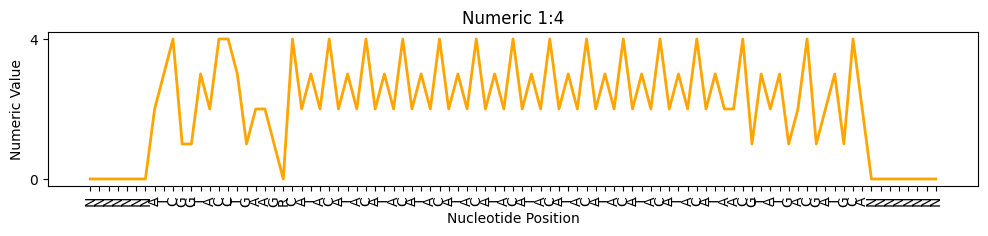

In [ ]:
def seq_encode(short_read_line):
    mapping = {'G': 1, 'A': 2, 'T': 3, 'C': 4, 'N': 0}
    return [mapping.get(base, 0) for base in short_read_line]

# Example DNA sequence
sequence= 'NNNNNNNATCGGTACCTGAAGRCATACATACATACATACATACATACATACATACATACATACATACATAACGTATGACGATGCANNNNNNNN'

dna_seq = seq_encode(sequence)

# Plot the numeric representation of the DNA sequence
plt.figure(figsize=(12, 2))
plt.plot(range(len(dna_seq)), dna_seq, color='orange', linewidth=2)
plt.yticks([ 0, 4])  # Set y-axis ticks to -2, 0, and 2
plt.xticks(range(len(dna_seq)), sequence, rotation=90)
plt.title('Numeric 1:4')
plt.xlabel('Nucleotide Position')
plt.ylabel('Numeric Value')
plt.show()

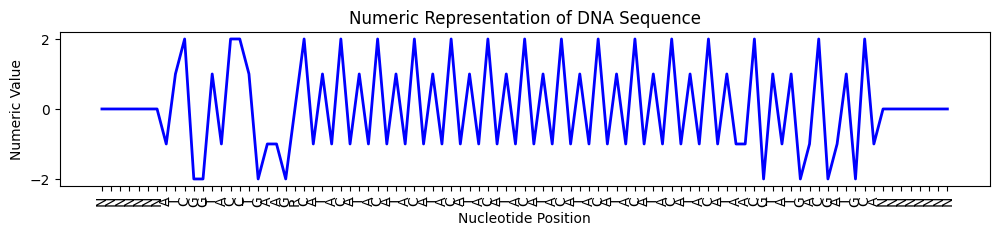

In [ ]:
def EII_encode(short_read_line):
    mapping = {'G': 6.488, 'A':  0.4629, 'T': 1.052, 'C': 3.943, 'N': 0}
    return [mapping.get(base, 0) for base in short_read_line]

# Example DNA sequence
sequence= 'NNNNNNNATCGGTACCTGAAGRCATACATACATACATACATACATACATACATACATACATACATACATAACGTATGACGATGCANNNNNNNN'
#two800_df_w.iloc[8,3]
dna_EII = EII_encode(sequence)

# Plot the numeric representation of the DNA sequence
plt.figure(figsize=(12, 2))
plt.plot(range(len(dna_sequence)), dna_sequence, color='blue', linewidth=2)
plt.yticks([-2, 0, 2])  # Set y-axis ticks to -2, 0, and 2
plt.xticks(range(len(dna_sequence)), sequence, rotation=90)
plt.title('Numeric Representation of DNA Sequence')
plt.xlabel('Nucleotide Position')
plt.ylabel('Numeric Value')
plt.show()

**Diferencia entre wavedec -descomposición y transforamción de wavelet discreta dwt**

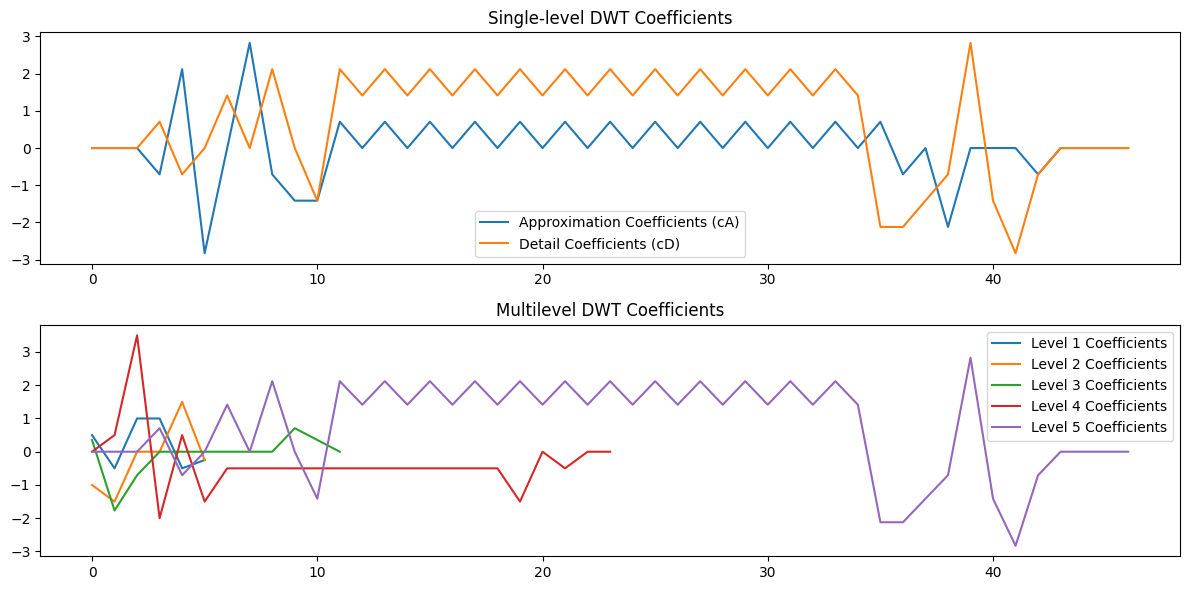

In [ ]:
import matplotlib.pyplot as plt
import pywt

def plot_dwt_coefficients(data, wavelet, mode, level):
    # Single-level DWT
    cA, cD = pywt.dwt(data, wavelet, mode=mode)

    # Multilevel DWT
    coeffs = pywt.wavedec(data, wavelet, mode=mode, level=level)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot Single-level DWT coefficients
    plt.subplot(2, 1, 1)
    plt.plot(cA, label='Approximation Coefficients (cA)')
    plt.plot(cD, label='Detail Coefficients (cD)')
    plt.title('Single-level DWT Coefficients')
    plt.legend()

    # Plot Multilevel DWT coefficients
    plt.subplot(2, 1, 2)
    for i, coeff in enumerate(coeffs):
        plt.plot(coeff, label=f'Level {i + 1} Coefficients')

    plt.title('Multilevel DWT Coefficients')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example DNA sequence
sequence = 'NNNNNNNATCGGTACCTGAAGRCATACATACATACATACATACATACATACATACATACATACATACATAACGTATGACGATGCANNNNNNNN'
dna_sequence = numeric_encode(sequence)

# Plot DWT coefficients
plot_dwt_coefficients(dna_sequence, 'haar', mode='symmetric', level=4)


**Cuál es la estructura de datos en la descomposicón multinivel wavedec**

In [ ]:
max_level = pywt.dwt_max_level(len(dna_sequence), 'haar')
print (max_level)
coeffs = pywt.wavedec(dna_sequence, 'haar', level=max_level)
coeffs


6


[array([ 1.  , -0.75]),
 array([-1.,  0.]),
 array([ 0.70710678,  0.        , -0.1767767 ]),
 array([-1.  , -1.5 ,  0.  ,  0.  ,  1.5 , -0.25]),
 array([ 0.35355339, -1.76776695, -0.70710678,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
         0.35355339,  0.        ]),
 array([ 0. ,  0.5,  3.5, -2. ,  0.5, -1.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.5,  0. , -0.5,
         0. ,  0. ]),
 array([ 0.        ,  0.        ,  0.        ,  0.70710678, -0.70710678,
         0.        ,  1.41421356,  0.        ,  2.12132034,  0.        ,
        -1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
         2.12132034,  1.41421356,  2.12132034,  1.41421356,  2.12132034,
         1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
         2.12132034,  1.41421356,  2.12132034,  1.41421356,  2.12132034,
         1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41

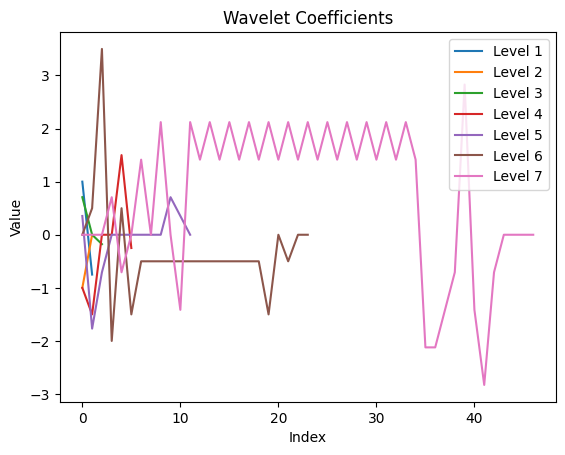

In [ ]:
# Plot each array separately

for i, coeff_array in enumerate(coeffs):
    plt.plot(coeff_array, label=f'Level {i + 1}')

plt.legend()
plt.title('Wavelet Coefficients')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

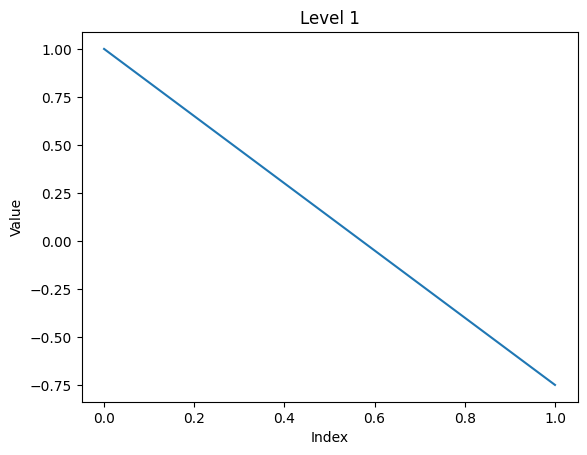

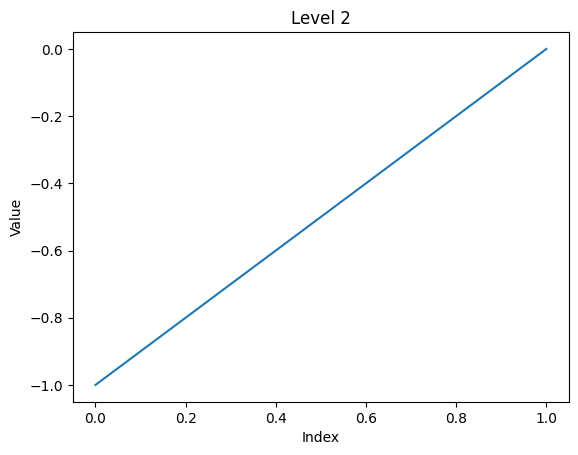

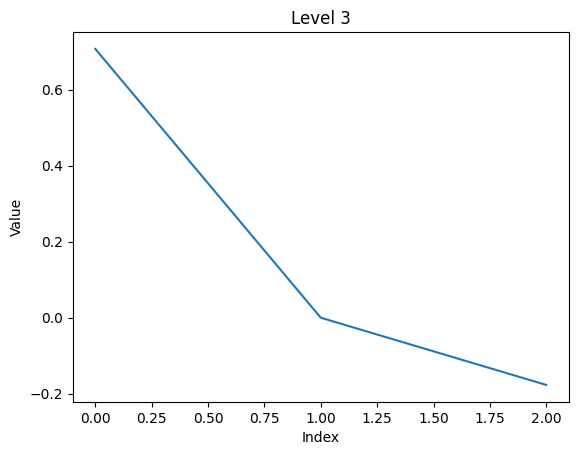

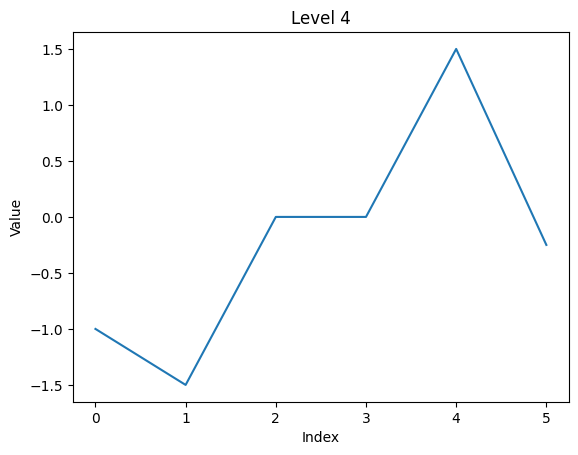

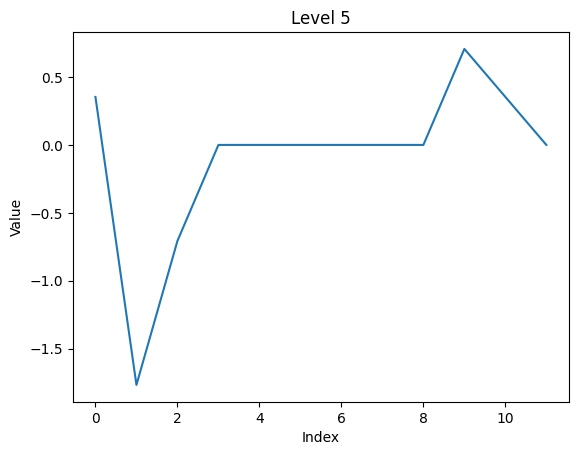

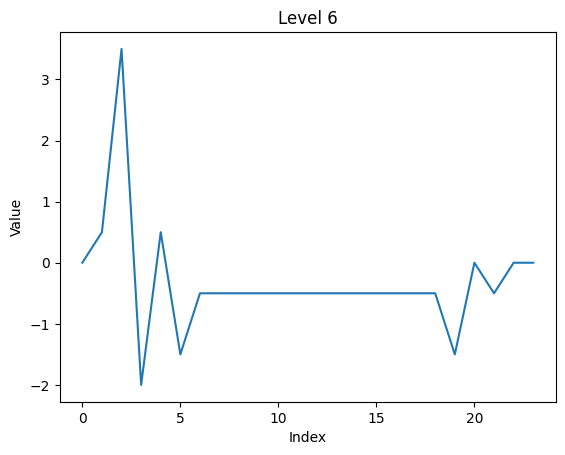

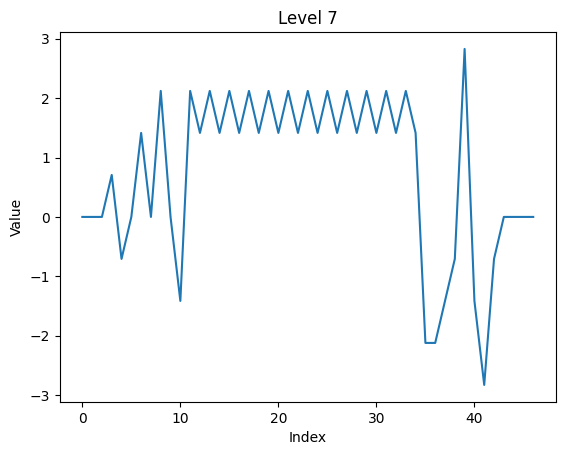

In [ ]:
# Create a separate plot for each array
for i, coeff_array in enumerate(coeffs):
    plt.figure()  # Create a new figure for each array
    plt.plot(coeff_array)
    plt.title(f'Level {i + 1}')
    plt.xlabel('Index')
    plt.ylabel('Value')

**No hay perdida de información - uso privacidad de datos sensibles**

In [ ]:
inverse_coefficients = pywt.waverec(coeffs, 'haar')
inverse_coefficients

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        1.00000000e+00,  2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        1.00000000e+00, -2.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -2.00000000e+00,  0.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
        1.00000000e+00, -

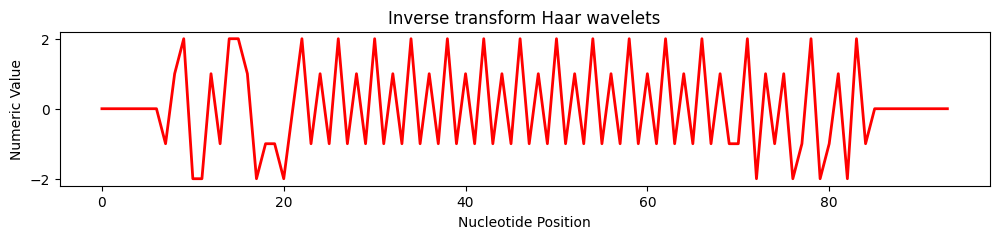

In [ ]:
plt.figure(figsize=(12, 2))
plt.plot(range(len(inverse_coefficients)), inverse_coefficients, color='red', linewidth=2)
plt.yticks([-2, 0, 2])  # Set y-axis ticks to -2, 0, and 2

plt.title('Inverse transform Haar wavelets')
plt.xlabel('Nucleotide Position')
plt.ylabel('Numeric Value')
plt.show()

**Clasificar una señal a partir de una descomposicón con un threshold que permita identificar STR**

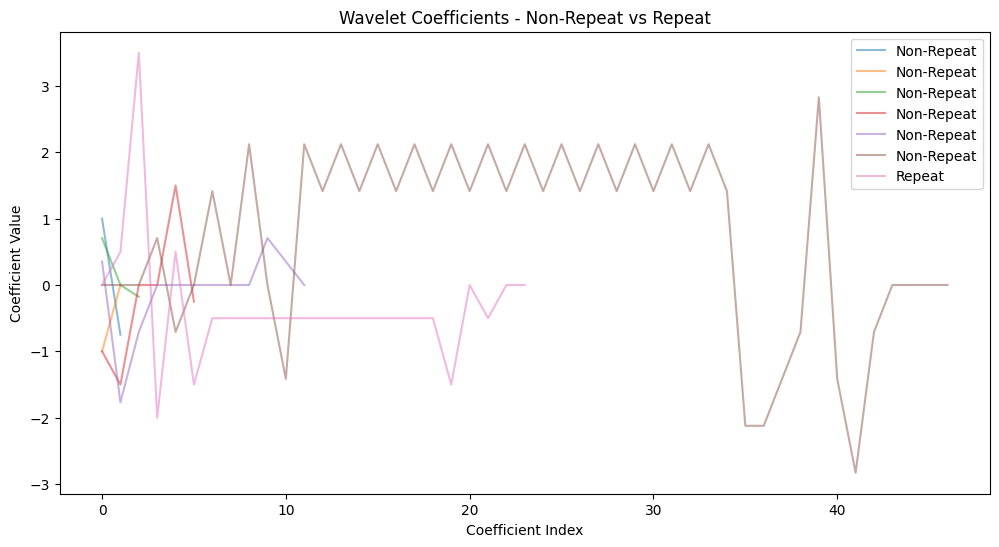

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def identify_repeating_sequences(sequence):
    # Numeric encoding of the sequence
    dna_sequence = numeric_encode(sequence)

    # discrete wavelet transformation
    coeffs = pywt.wavedec(dna_sequence, 'haar')

    # Classify data into non-repeat and repeat bins based on coefficients
    threshold = 3  # Adjust the threshold as needed
    repeat_bin = [coeff for coeff in coeffs if max(coeff) > threshold]
    non_repeat_bin = [coeff for coeff in coeffs if max(coeff) <= threshold]

    return non_repeat_bin, repeat_bin

def plot_wavelet_coefficients(non_repeat, repeat):
    plt.figure(figsize=(12, 6))

    # Plot non-repeat coefficients
    for coeff in non_repeat:
        plt.plot(coeff, label='Non-Repeat', alpha=0.5)

    # Plot repeat coefficients
    for coeff in repeat:
        plt.plot(coeff, label='Repeat', alpha=0.5)

    plt.title('Wavelet Coefficients - Non-Repeat vs Repeat')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.show()
# Apply the method
non_repeat, repeat = identify_repeating_sequences(sequence)

# Plot the coefficients
plot_wavelet_coefficients(non_repeat, repeat)

[array([ 1.  , -0.75]), array([-1.,  0.]), array([ 0.70710678,  0.        , -0.1767767 ]), array([-1.  , -1.5 ,  0.  ,  0.  ,  1.5 , -0.25]), array([ 0.35355339, -1.76776695, -0.70710678,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
        0.35355339,  0.        ]), array([ 0. ,  0.5,  3.5, -2. ,  0.5, -1.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.5,  0. , -0.5,
        0. ,  0. ]), array([ 0.        ,  0.        ,  0.        ,  0.70710678, -0.70710678,
        0.        ,  1.41421356,  0.        ,  2.12132034,  0.        ,
       -1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
        2.12132034,  1.41421356,  2.12132034,  1.41421356,  2.12132034,
        1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
        2.12132034,  1.41421356,  2.12132034,  1.41421356,  2.12132034,
        1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
       -

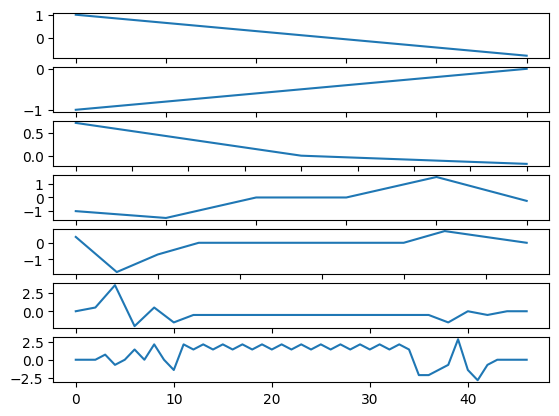

In [ ]:
detail_coeffs = coeffs[0:]
print(approx_coeff)
for i, coeff in enumerate(detail_coeffs):
    plt.subplot(len(detail_coeffs), 1, i+1)
    plt.plot(coeff, label=f'D{len(detail_coeffs)-i}')
    #plt.legend()

plt.show()

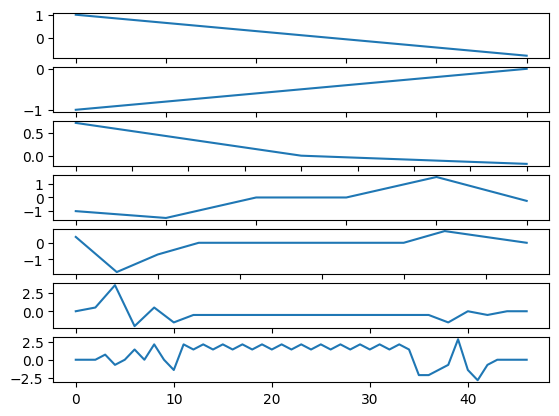

In [ ]:
approx_coeff =  coeffs[0:]
#print(approx_coeff)
for i, coeff in enumerate(approx_coeff):
    plt.subplot(len(approx_coeff), 1, i+1)
    plt.plot(coeff, label=f'D{len(approx_coeff)-i}')
    #plt.legend()

plt.show()


**Cuantos filtros se encuentras disponibles, que caracteristicas resaltan dichos filtros y que implicación tiene los niveles de análisis**

In [ ]:
import pywt

# Get a list of available wavelet names
wavelet_names = pywt.wavelist()

# Display the names of the wavelets
print("Available Wavelets:")
for wavelet_name in wavelet_names:
    print(wavelet_name)


Available Wavelets:
bior1.1
bior1.3
bior1.5
bior2.2
bior2.4
bior2.6
bior2.8
bior3.1
bior3.3
bior3.5
bior3.7
bior3.9
bior4.4
bior5.5
bior6.8
cgau1
cgau2
cgau3
cgau4
cgau5
cgau6
cgau7
cgau8
cmor
coif1
coif2
coif3
coif4
coif5
coif6
coif7
coif8
coif9
coif10
coif11
coif12
coif13
coif14
coif15
coif16
coif17
db1
db2
db3
db4
db5
db6
db7
db8
db9
db10
db11
db12
db13
db14
db15
db16
db17
db18
db19
db20
db21
db22
db23
db24
db25
db26
db27
db28
db29
db30
db31
db32
db33
db34
db35
db36
db37
db38
dmey
fbsp
gaus1
gaus2
gaus3
gaus4
gaus5
gaus6
gaus7
gaus8
haar
mexh
morl
rbio1.1
rbio1.3
rbio1.5
rbio2.2
rbio2.4
rbio2.6
rbio2.8
rbio3.1
rbio3.3
rbio3.5
rbio3.7
rbio3.9
rbio4.4
rbio5.5
rbio6.8
shan
sym2
sym3
sym4
sym5
sym6
sym7
sym8
sym9
sym10
sym11
sym12
sym13
sym14
sym15
sym16
sym17
sym18
sym19
sym20


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


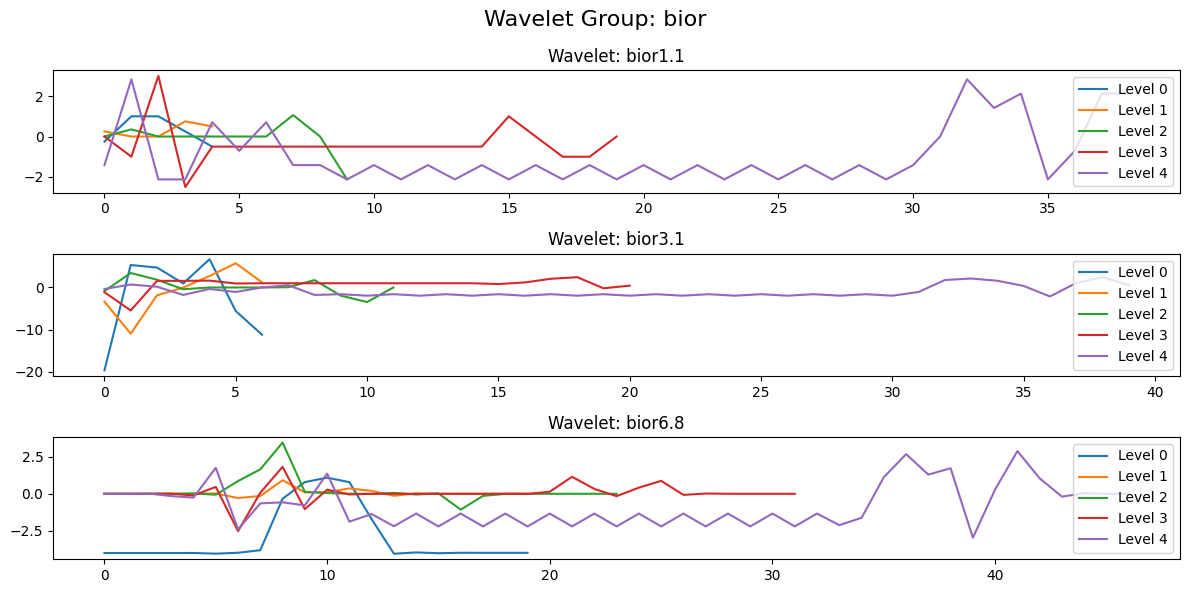

<Figure size 1200x600 with 0 Axes>

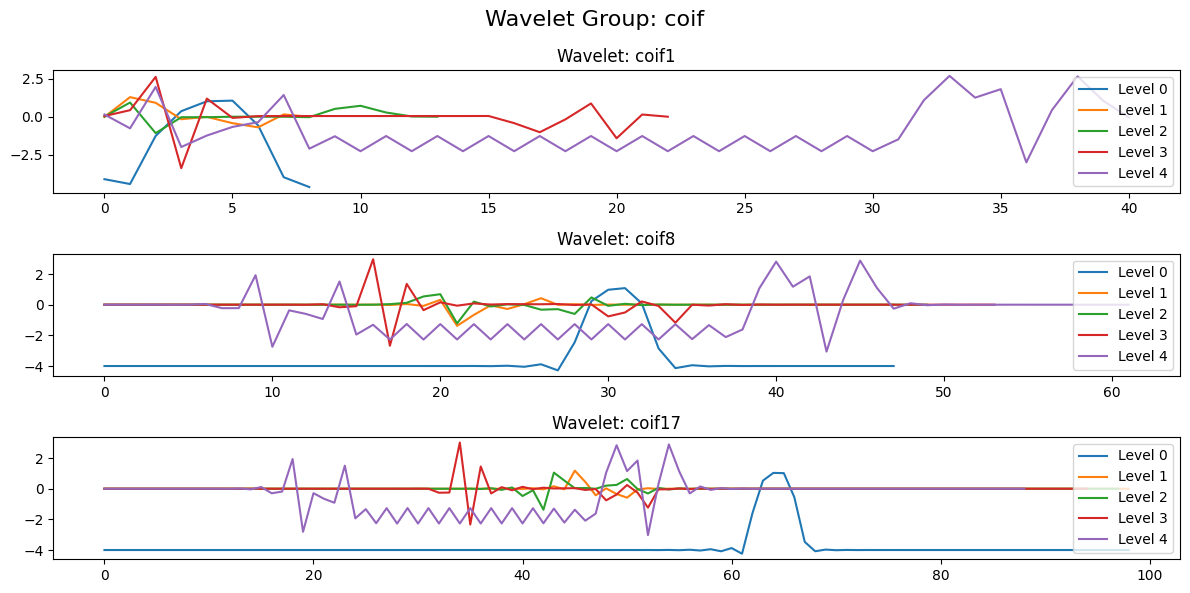

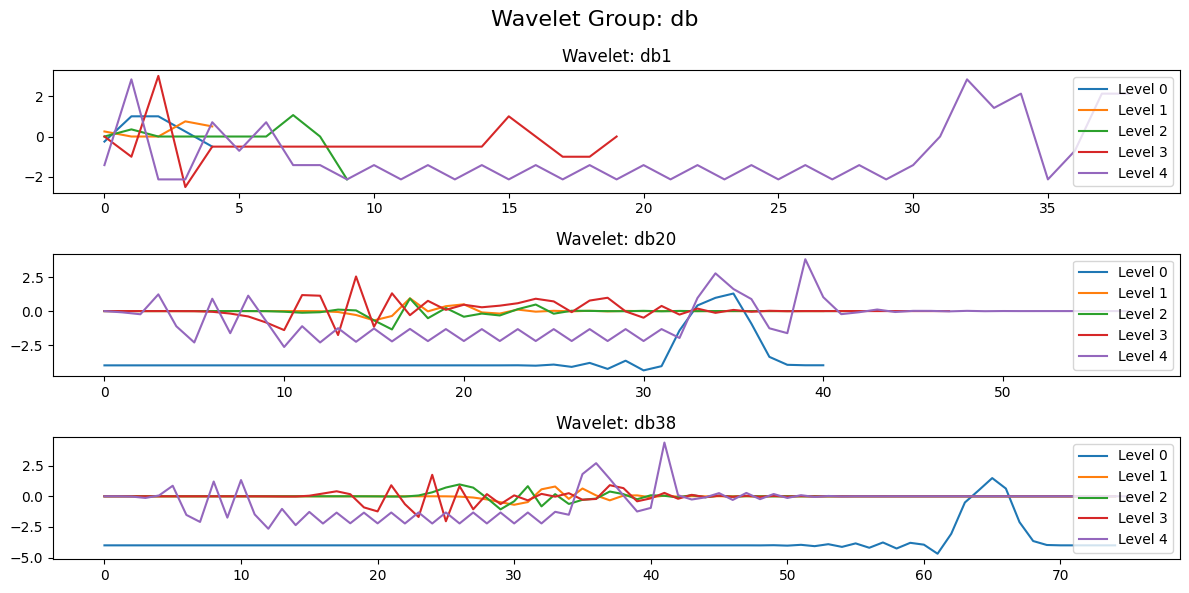

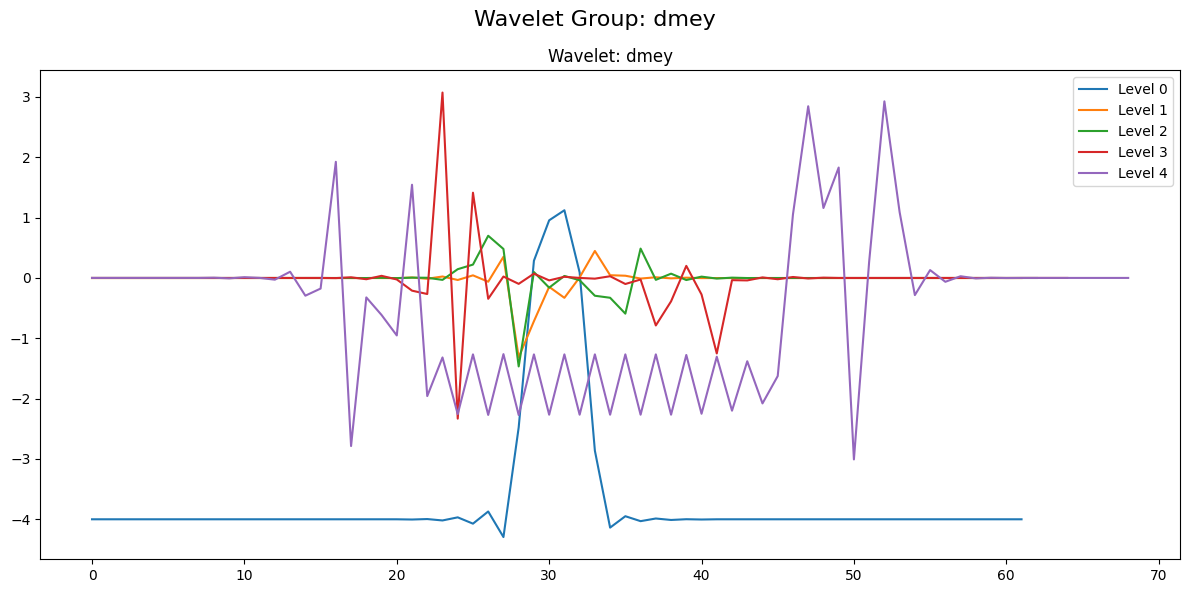

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

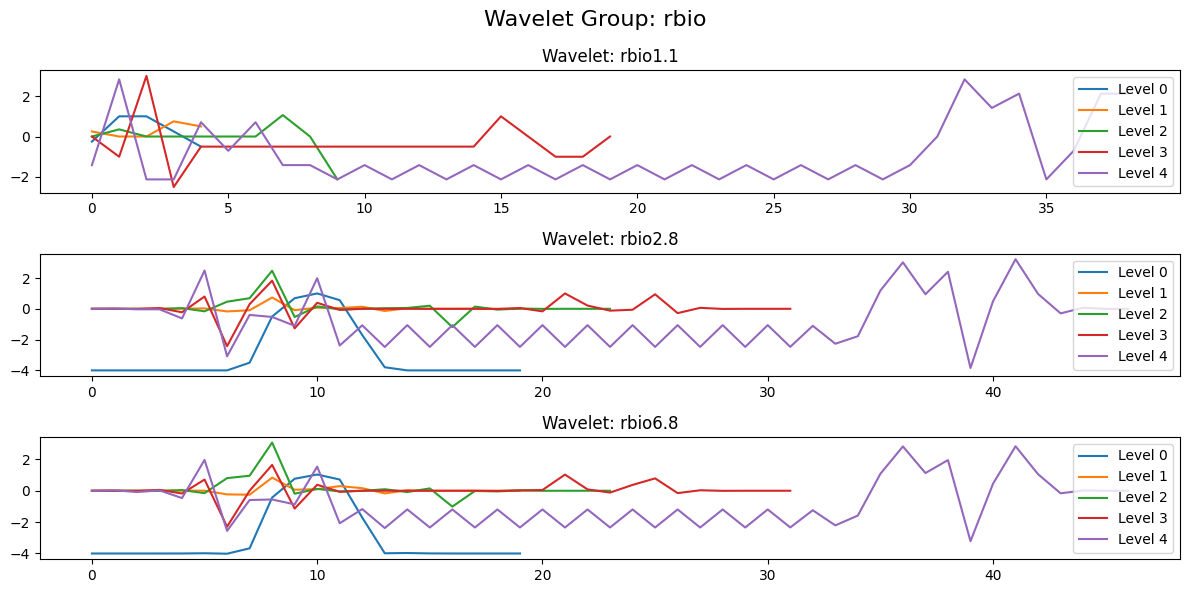

<Figure size 1200x600 with 0 Axes>

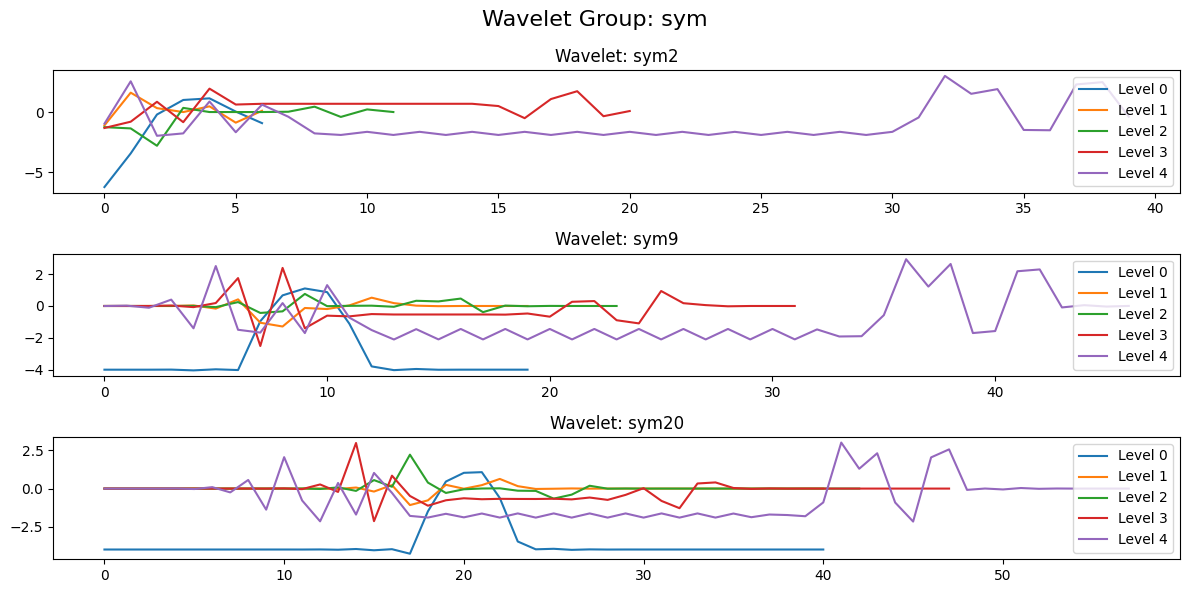

In [ ]:
import pywt
import matplotlib.pyplot as plt

# List of wavelet names
wavelet_names = [
    'bior1.1', 'bior3.1', 'bior6.8', 'cgau1', 'cgau4', 'cgau8',
    'cmor', 'coif1', 'coif8', 'coif17', 'db1', 'db20', 'db38',
    'dmey', 'fbsp', 'gaus1', 'gaus8', 'mexh', 'morl', 'rbio1.1',
    'rbio2.8', 'rbio6.8', 'shan', 'sym2', 'sym9', 'sym20'
]

# Dictionary to group wavelets by family or characteristic
wavelet_groups = {
    'bior': ['bior1.1', 'bior3.1', 'bior6.8'],
    'cgau': ['cgau1', 'cgau4', 'cgau8'],
    'coif': ['coif1', 'coif8', 'coif17'],
    'db': ['db1', 'db20', 'db38'],
    'dmey': ['dmey'],
    'fbsp': ['fbsp'],
    'gaus': ['gaus1', 'gaus8'],
    'mexh': ['mexh'],
    'morl': ['morl'],
    'rbio': ['rbio1.1', 'rbio2.8', 'rbio6.8'],
    'shan': ['shan'],
    'sym': ['sym2', 'sym9', 'sym20']
}


# Decomposition level
max_level = 4

# Plot each big group of wavelets
for group_name, wavelets_in_group in wavelet_groups.items():
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Wavelet Group: {group_name}', fontsize=16)

    for i, wavelet_name in enumerate(wavelets_in_group):
        if wavelet_name in pywt.wavelist(kind='discrete'):
            coeffs = pywt.wavedec(dna_sequence, wavelet_name, mode='constant', level=max_level)
            plt.subplot(len(wavelets_in_group), 1, i + 1)
            for j, coeff in enumerate(coeffs):
                plt.plot(coeff, label=f'Level {j}')

            plt.title(f'Wavelet: {wavelet_name}')
            plt.legend()

    plt.tight_layout()
    plt.show()


Se dejo distintos nivels , y para distintos uso de valores, con el fin de reutilizar el codigo en otras secuencias mas complejas. Que son los modos y que nos dice en los coeficientes. **Padding**

In [ ]:

print(pywt.Modes.modes)

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect', 'antisymmetric', 'antireflect']


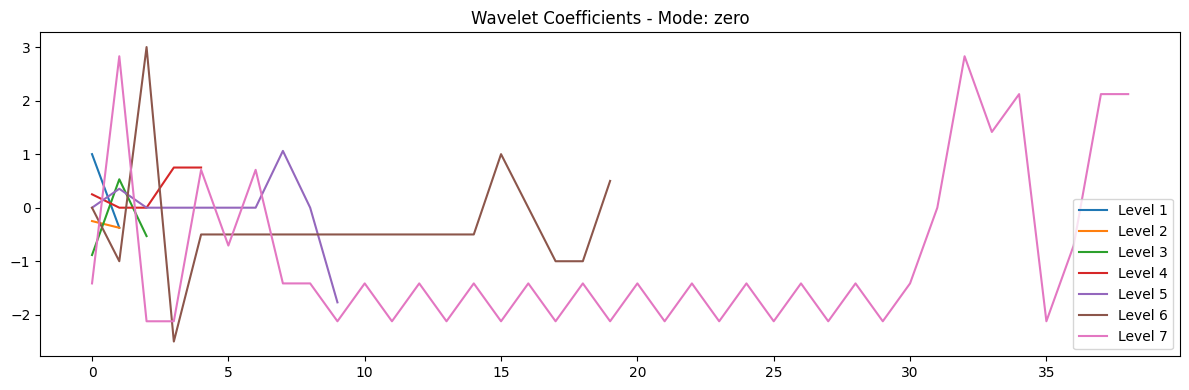

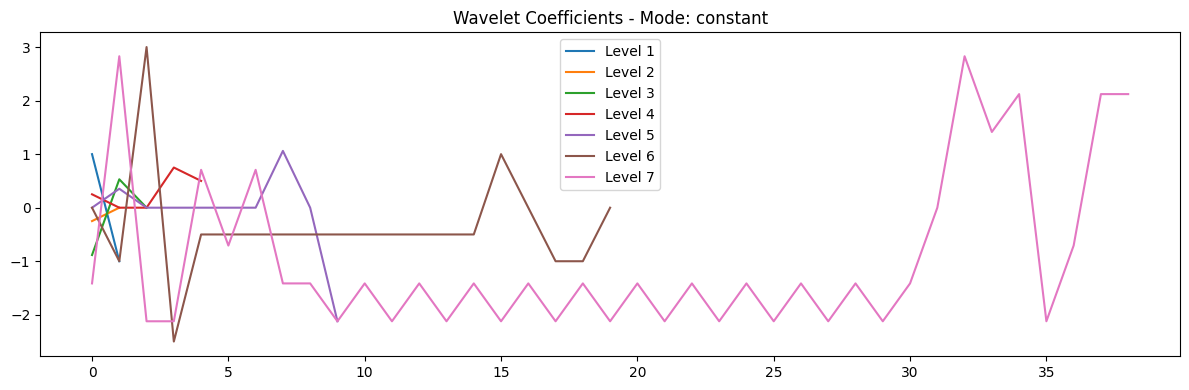

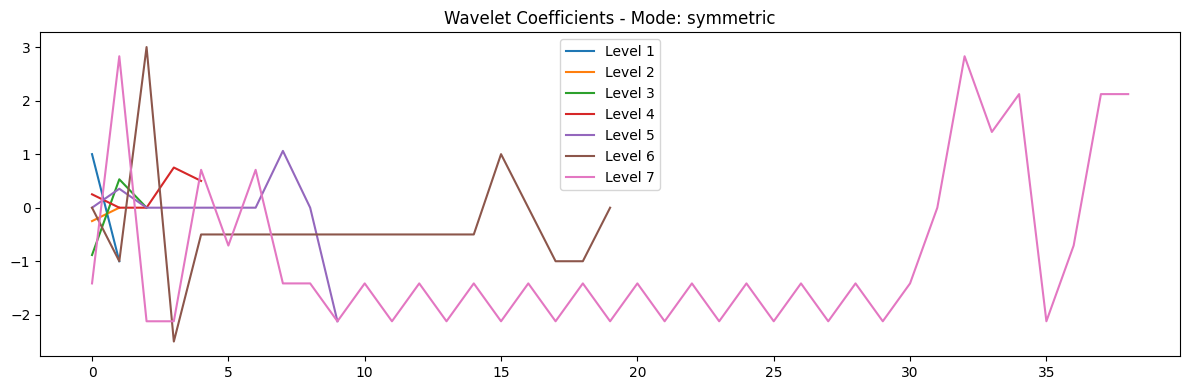

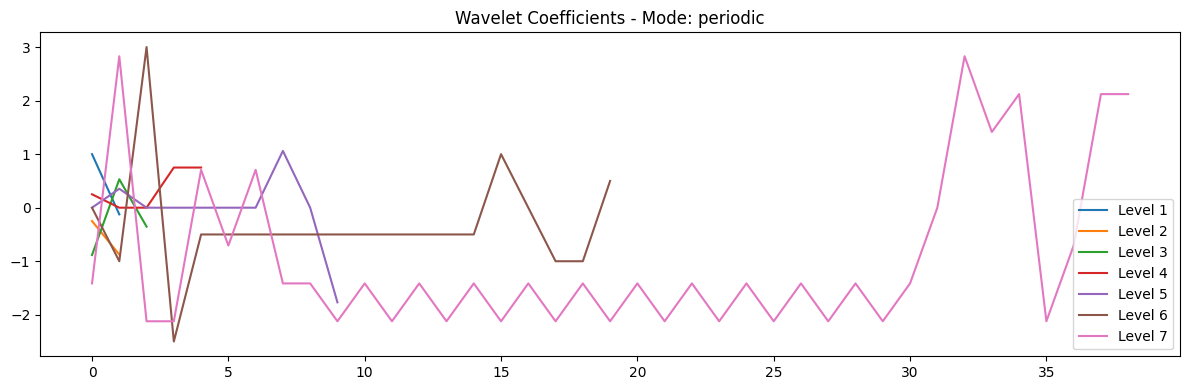

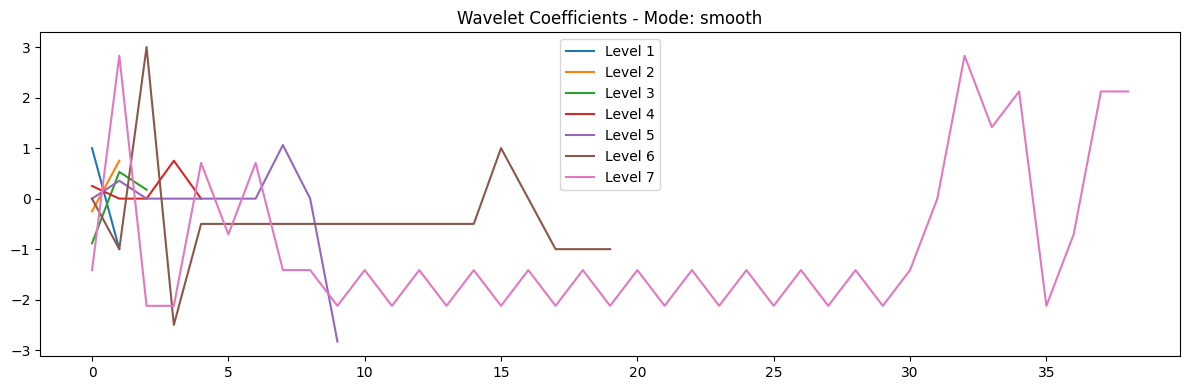

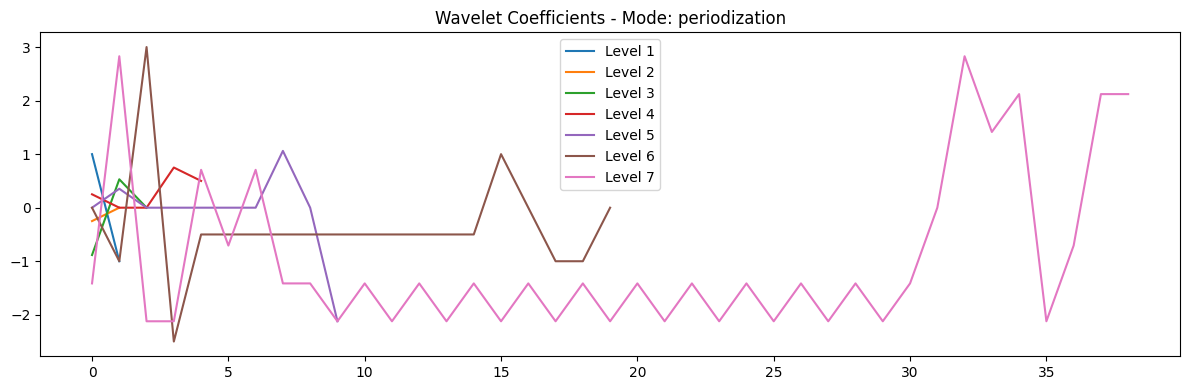

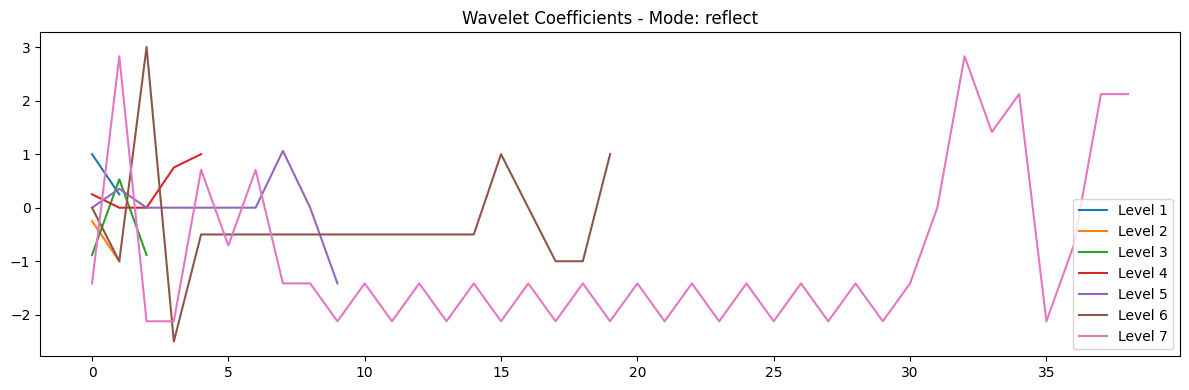

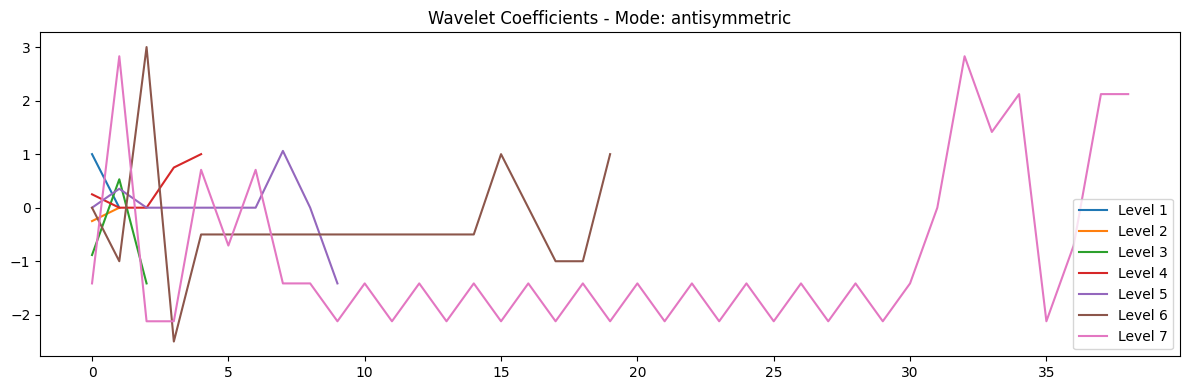

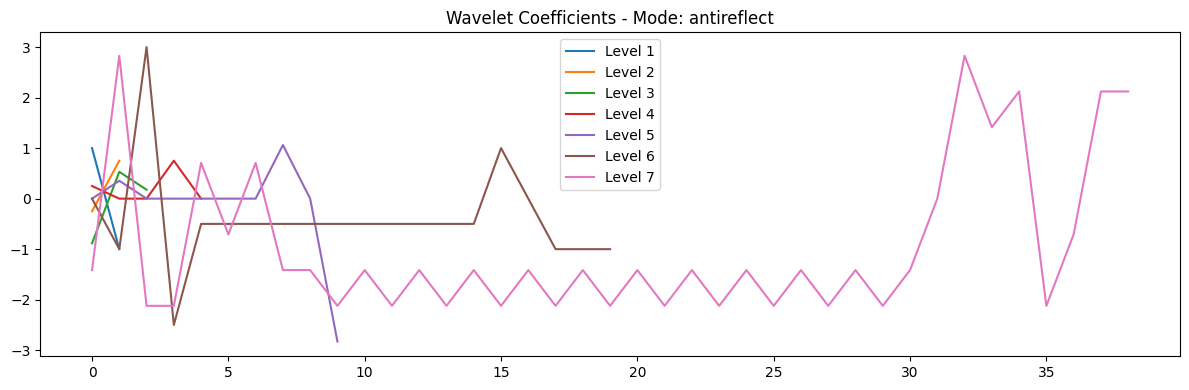

[array([ 1.  , -0.75]), array([-1.,  0.]), array([ 0.70710678,  0.        , -0.1767767 ]), array([-1.  , -1.5 ,  0.  ,  0.  ,  1.5 , -0.25]), array([ 0.35355339, -1.76776695, -0.70710678,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
        0.35355339,  0.        ]), array([ 0. ,  0.5,  3.5, -2. ,  0.5, -1.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -1.5,  0. , -0.5,
        0. ,  0. ]), array([ 0.        ,  0.        ,  0.        ,  0.70710678, -0.70710678,
        0.        ,  1.41421356,  0.        ,  2.12132034,  0.        ,
       -1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
        2.12132034,  1.41421356,  2.12132034,  1.41421356,  2.12132034,
        1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
        2.12132034,  1.41421356,  2.12132034,  1.41421356,  2.12132034,
        1.41421356,  2.12132034,  1.41421356,  2.12132034,  1.41421356,
       -

In [ ]:
import matplotlib.pyplot as plt
import pywt

def plot_wavelet_coefficients(data, wavelet, mode, level):
    coeffs = pywt.wavedec(data, wavelet, mode=mode, level=level)

    plt.figure(figsize=(12, 4))

    # Plot the coefficients
    for i, coeff in enumerate(coeffs):
        plt.plot(coeff, label=f'Level {i + 1}')

    plt.title(f'Wavelet Coefficients - Mode: {mode}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return coeffs

# Example DNA sequence
sequence = 'ATCGGTACCTGAAGRCATACATACATACATACATACATACATACATACATACATACATACATAACGTATGACGATGCA'
dna_sequence = numeric_encode(sequence)

# Modes to test
modes = ['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect', 'antisymmetric', 'antireflect']

# Decomposition level
level = max_level

# Plot for each mode
for mode in modes:
    plot_wavelet_coefficients(dna_sequence, 'haar', mode, level)
print (coeffs)

#https://pywavelets.readthedocs.io/en/latest/ref/signal-extension-modes.html#ref-modes

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect', 'antisymmetric', 'antireflect']


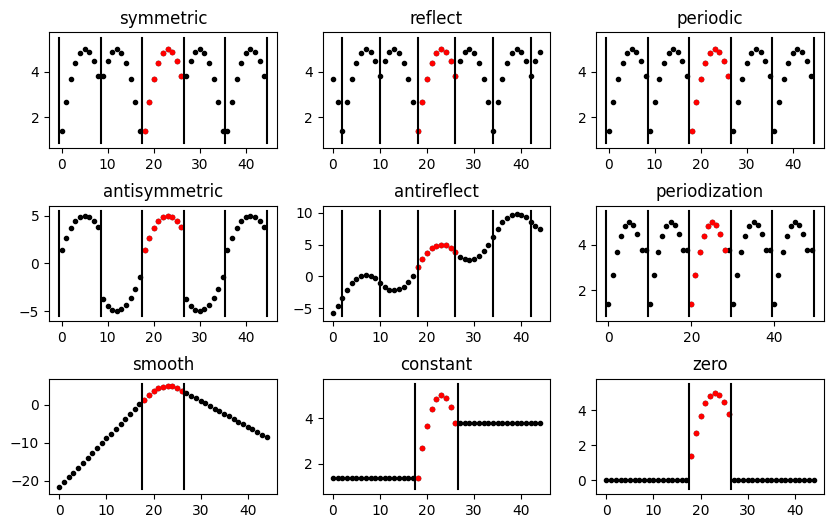

In [ ]:
#https://pywavelets.readthedocs.io/en/latest/ref/signal-extension-modes.html
import numpy as np
from matplotlib import pyplot as plt
from pywt._doc_utils import boundary_mode_subplot

# synthetic test signal
x = 5 - np.linspace(-1.9, 1.1, 9)**2
import pywt
print(pywt.Modes.modes)

# Create a figure with one subplots per boundary mode
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
boundary_mode_subplot(x, 'symmetric', axes[0], symw=False)
boundary_mode_subplot(x, 'reflect', axes[1], symw=True)
boundary_mode_subplot(x, 'periodic', axes[2], symw=False)
boundary_mode_subplot(x, 'antisymmetric', axes[3], symw=False)
boundary_mode_subplot(x, 'antireflect', axes[4], symw=True)
boundary_mode_subplot(x, 'periodization', axes[5], symw=False)
boundary_mode_subplot(x, 'smooth', axes[6], symw=False)
boundary_mode_subplot(x, 'constant', axes[7], symw=False)
boundary_mode_subplot(x, 'zero', axes[8], symw=False)
plt.show()

In [ ]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [ ]:
pywt.wavelist(kind='descrite')

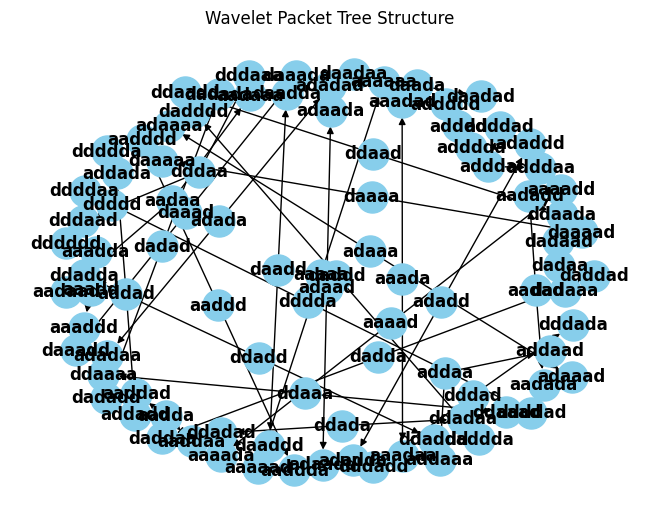

In [ ]:
Ver ramas de cada descomposición
import pywt
import networkx as nx
import matplotlib.pyplot as plt
# Perform wavelet packet decomposition
wp = pywt.WaveletPacket(data=dna_sequence, wavelet='haar', mode='symmetric')
# Create a directed graph for visualization
G = nx.DiGraph()

# Add nodes and edges based on the wavelet packet tree structure
for node in wp.get_level(wp.maxlevel, order='natural'):
    G.add_node(node.path)
    if node.parent is not None:
        G.add_edge(node.parent.path, node.path)

# Plot the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=500, node_color='skyblue')
plt.title('Wavelet Packet Tree Structure')
plt.show()


In [ ]:
#Plot a directed graph for each decomposition level
for level in range(1, wp.maxlevel + 1):
    # Create a directed graph for visualization
    G = nx.DiGraph()

    # Add nodes and edges based on the wavelet packet tree structure at the current level
    for node in wp.get_level(level, order='freq'):
        G.add_node(node.path)
        if node.parent is not None:
            G.add_edge(node.parent.path, node.path)

    # Plot the graph
    pos = nx.spring_layout(G)  # You can use different layout algorithms
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=500, node_color='skyblue')
    plt.title(f'Wavelet Packet Tree Structure - Level {level}')
    plt.show()

Otra manera de apreciar la descomposición de la señal

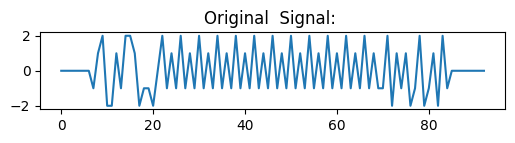

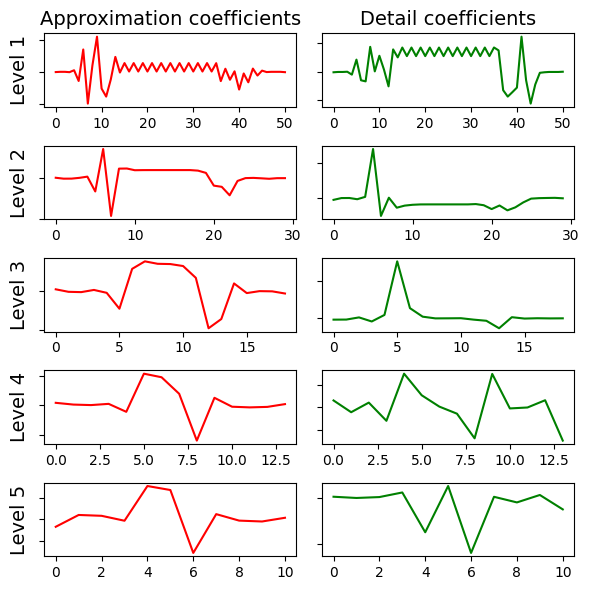

In [4]:
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original  Signal: ")
ax.plot(dna_sequence)
plt.show()

data = dna_sequence
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

Veamos waveletPacket, descomposicón y el acceso a sus ramas y nodos/subnodos

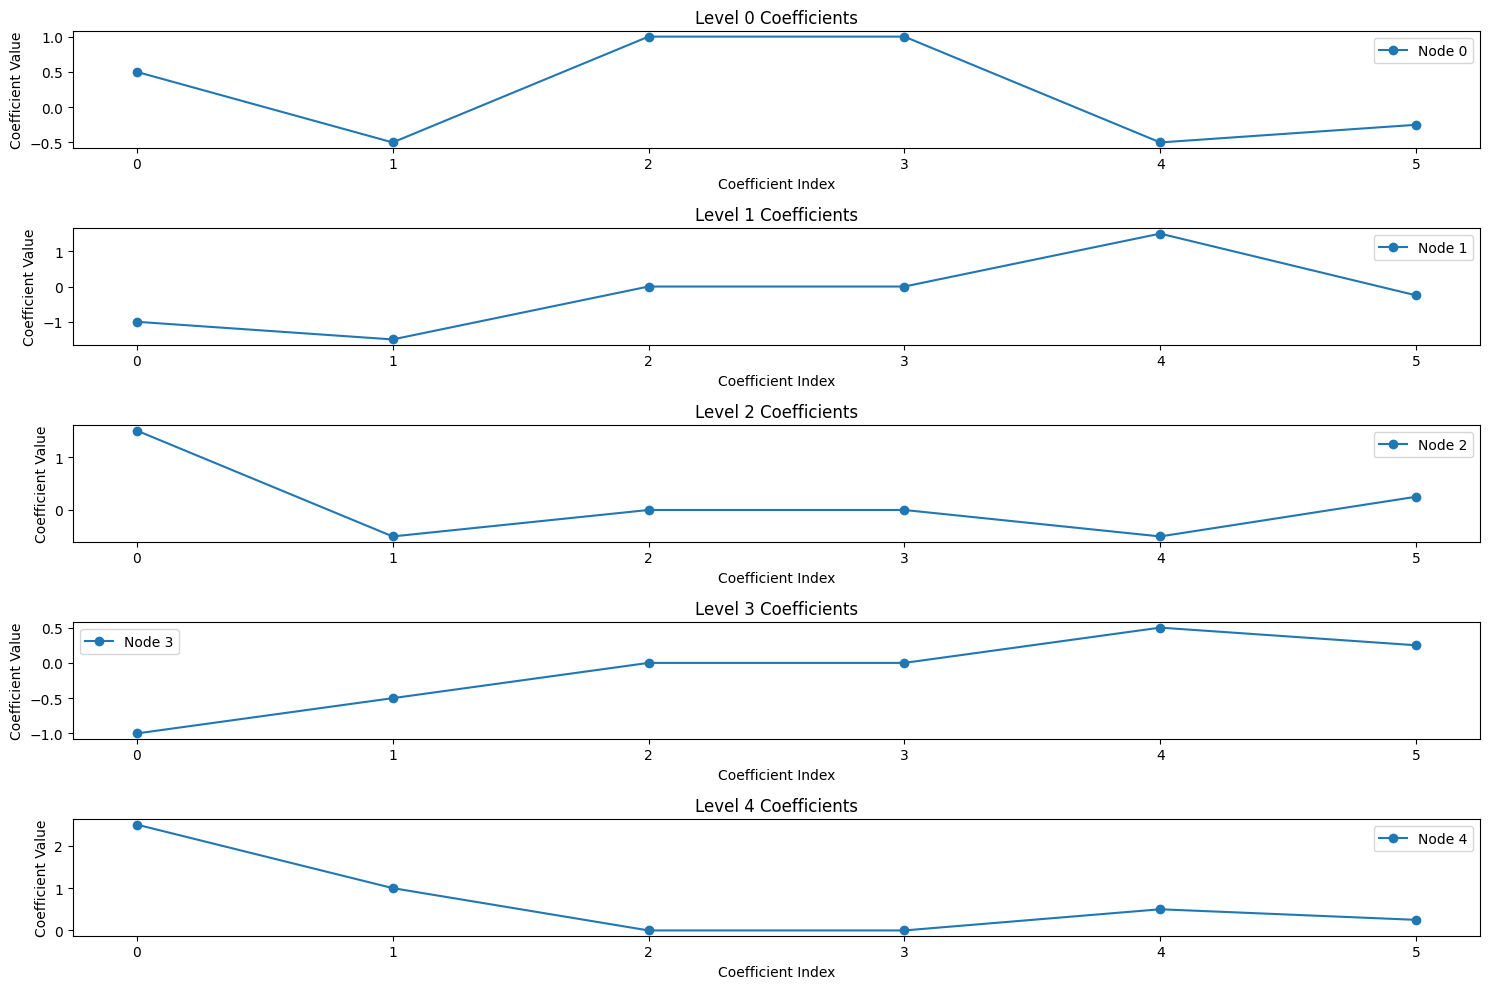

In [ ]:

def plot_wavelet_packet(node, level):
    plt.figure(figsize=(15, 10))

    for i in range(level + 1):
        plt.subplot(level + 1, 1, i + 1)
        plt.plot(node[i], marker='o', linestyle='-', label=f'Node {i}')
        plt.title(f'Level {i} Coefficients')
        plt.xlabel('Coefficient Index')
        plt.ylabel('Coefficient Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Perform wavelet packet decomposition
wp = pywt.WaveletPacket(data=dna_sequence, wavelet='haar', mode='symmetric')

# Extract coefficients at each level
node = [wp[node.path].data for node in wp.get_level(level=4, order='freq')]

# Plot the wavelet packet
plot_wavelet_packet(node, level=4)

[ 0.          0.          0.         -0.70710678  2.12132034 -2.82842712
  0.          2.82842712 -0.70710678 -1.41421356 -1.41421356  0.70710678
  0.          0.70710678  0.          0.70710678  0.          0.70710678
  0.          0.70710678  0.          0.70710678  0.          0.70710678
  0.          0.70710678  0.          0.70710678  0.          0.70710678
  0.          0.70710678  0.          0.70710678  0.          0.70710678
 -0.70710678  0.         -2.12132034  0.          0.          0.
 -0.70710678  0.          0.          0.          0.        ]
[ 0.   0.5  3.5 -2.   0.5 -1.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5 -0.5 -0.5 -0.5 -0.5 -1.5  0.  -0.5  0.   0. ]


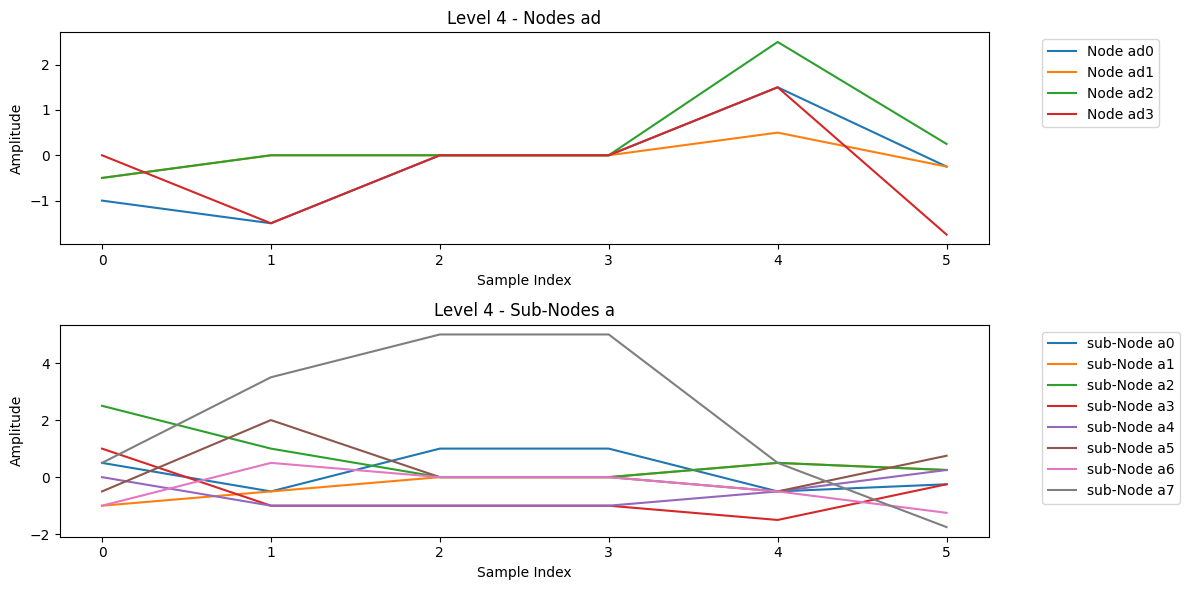

In [ ]:
print(wp['a'].data)
print(wp['ad'].data)

def plot_wavelet_packet_nodes(wp, level):
    nodes_ad = [node.data for node in wp.get_level(level, order='freq') if node.path.endswith('ad')]
    nodes_a = [node.data for node in wp.get_level(level, order='freq') if node.path.endswith('a')]

    plt.figure(figsize=(12, 6))

    # Plot 'ad' nodes
    plt.subplot(2, 1, 1)
    for i, node_ad in enumerate(nodes_ad):
        plt.plot(node_ad, label=f'Node ad{i}')

    plt.title(f'Level {level} - Nodes ad')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot 'a' nodes
    plt.subplot(2, 1, 2)
    for i, node_a in enumerate(nodes_a):
        plt.plot(node_a, label=f'sub-Node a{i}')

    plt.title(f'Level {level} - Sub-Nodes a')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
plot_wavelet_packet_nodes(wp, level=4)


In [ ]:
print(new_wp.reconstruct(update=False))

[ 0.          0.          0.          0.12940952 -0.87119148  1.96652683
 -2.28540504 -0.1640847   3.12192135 -1.28480404 -1.76776695 -0.38822857
  0.48296291  0.22414387  0.48296291  0.22414387  0.48296291  0.22414387
  0.48296291  0.22414387  0.48296291  0.22414387  0.48296291  0.22414387
  0.48296291  0.22414387  0.48296291  0.22414387  0.48296291  0.22414387
  0.48296291  0.22414387  0.48296291  0.22414387  0.48296291 -0.8365163
  0.61237244 -0.48296291  0.03467518 -1.09533535 -1.06066017 -0.35355339
  0.48296291 -0.48296291  0.          0.          0.          0.        ]
[ 0.         -0.0625     -1.70753175 -2.16057621  3.56458256 -1.40729128
  0.61153811  0.1830127   0.1830127   0.1830127   0.1830127   0.1830127
  0.1830127   0.1830127   0.1830127   0.1830127   0.1830127   0.69527223
  0.8705127   0.58701905 -0.47548095  0.85376588  0.04575318  0.
  0.        ]


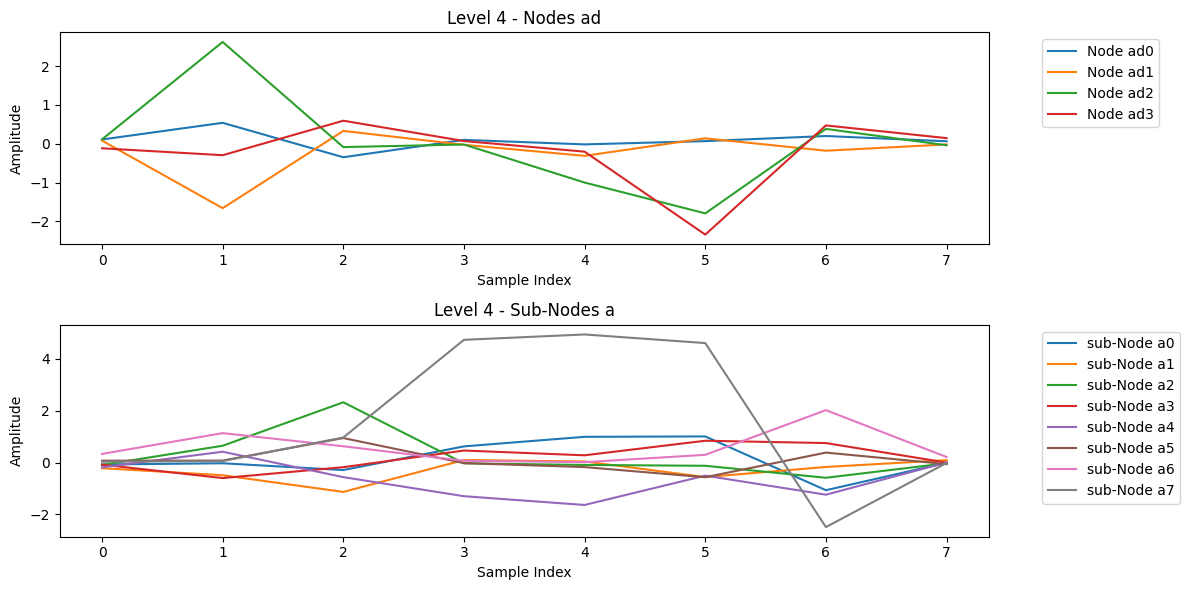

In [ ]:
print(wp['a'].data)
print(wp['ad'].data)

def plot_wavelet_packet_nodes(wp, level):
    nodes_ad = [node.data for node in wp.get_level(level, order='freq') if node.path.endswith('ad')]
    nodes_a = [node.data for node in wp.get_level(level, order='freq') if node.path.endswith('a')]

    plt.figure(figsize=(12, 6))

    # Plot 'ad' nodes
    plt.subplot(2, 1, 1)
    for i, node_ad in enumerate(nodes_ad):
        plt.plot(node_ad, label=f'Node ad{i}')

    plt.title(f'Level {level} - Nodes ad')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot 'a' nodes
    plt.subplot(2, 1, 2)
    for i, node_a in enumerate(nodes_a):
        plt.plot(node_a, label=f'sub-Node a{i}')

    plt.title(f'Level {level} - Sub-Nodes a')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
plot_wavelet_packet_nodes(wp, level=4)

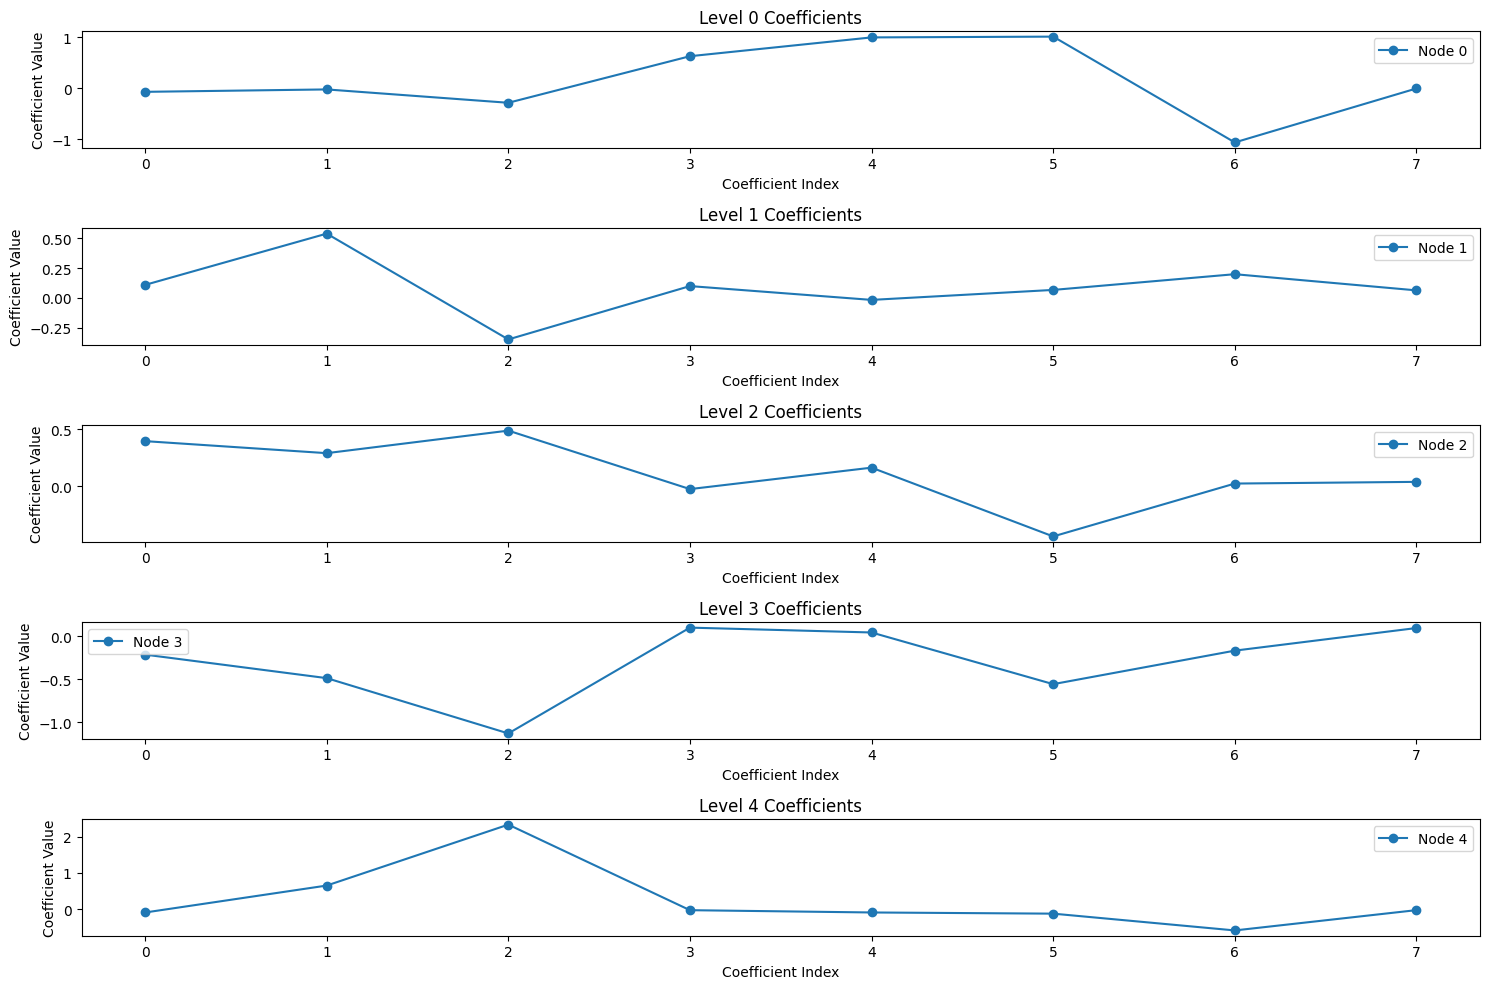

In [ ]:

# Perform wavelet packet decomposition
wp = pywt.WaveletPacket(data=dna_sequence, wavelet='db2', mode='symmetric', maxlevel=4)

# Extract coefficients at each level
node = [wp[node.path].data for node in wp.get_level(level=4, order='freq')]

# Plot the wavelet packet
plot_wavelet_packet(node, level=4)

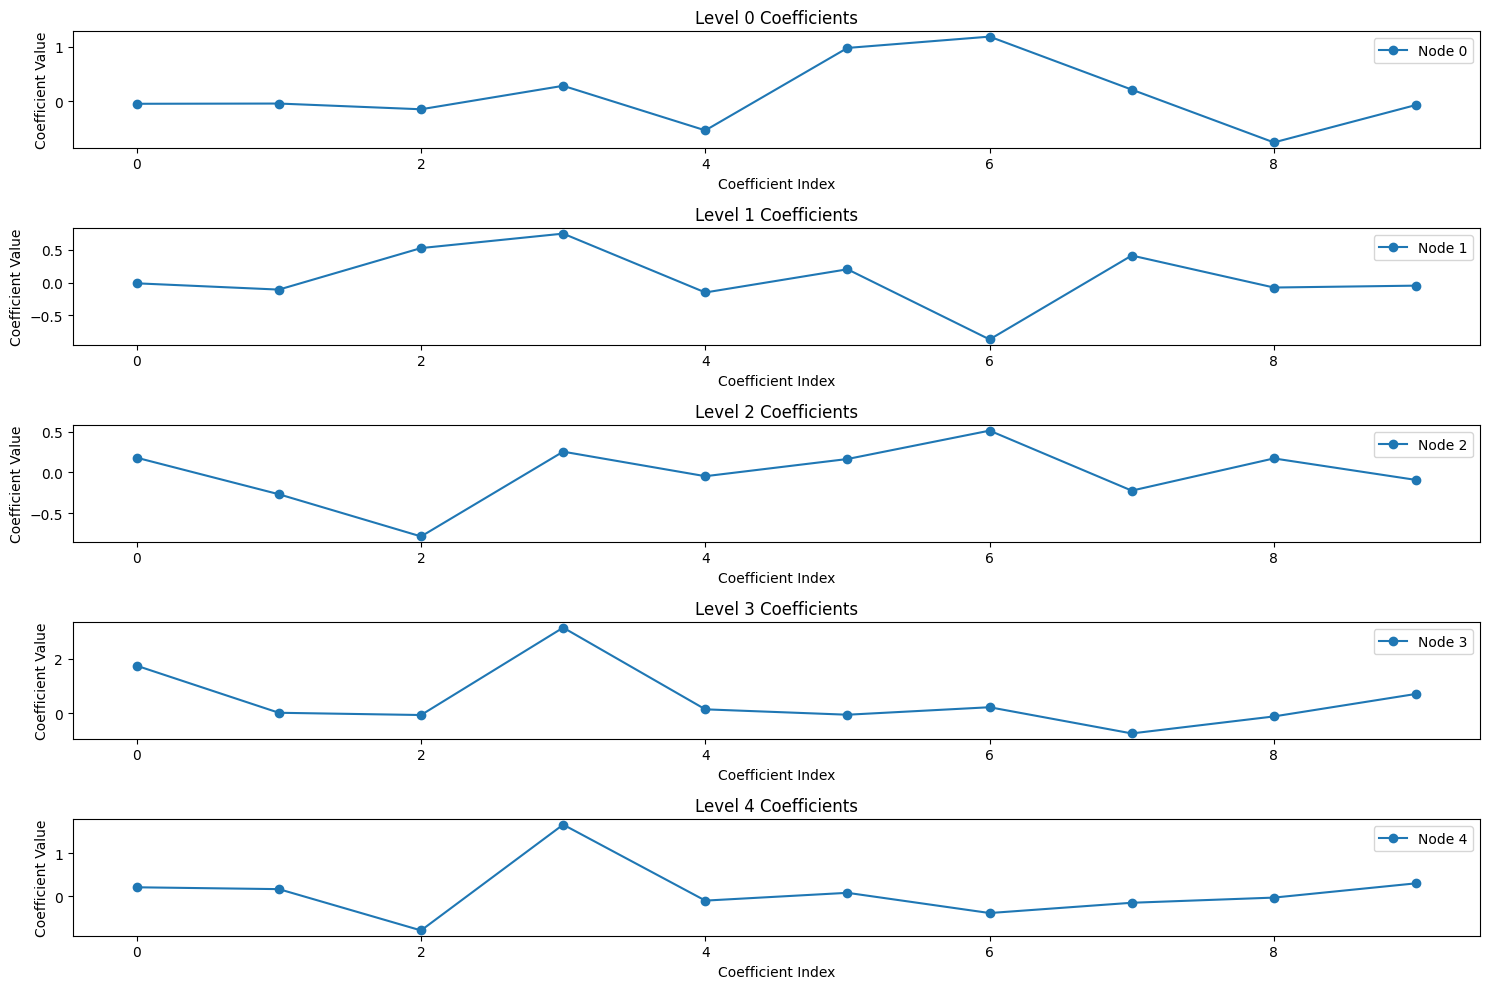

In [ ]:

# Perform wavelet packet decomposition
wp = pywt.WaveletPacket(data=dna_sequence, wavelet='db3', mode='symmetric', maxlevel=4)

# Extract coefficients at each level
node = [wp[node.path].data for node in wp.get_level(level=4, order='freq')]

# Plot the wavelet packet
plot_wavelet_packet(node, level=4)

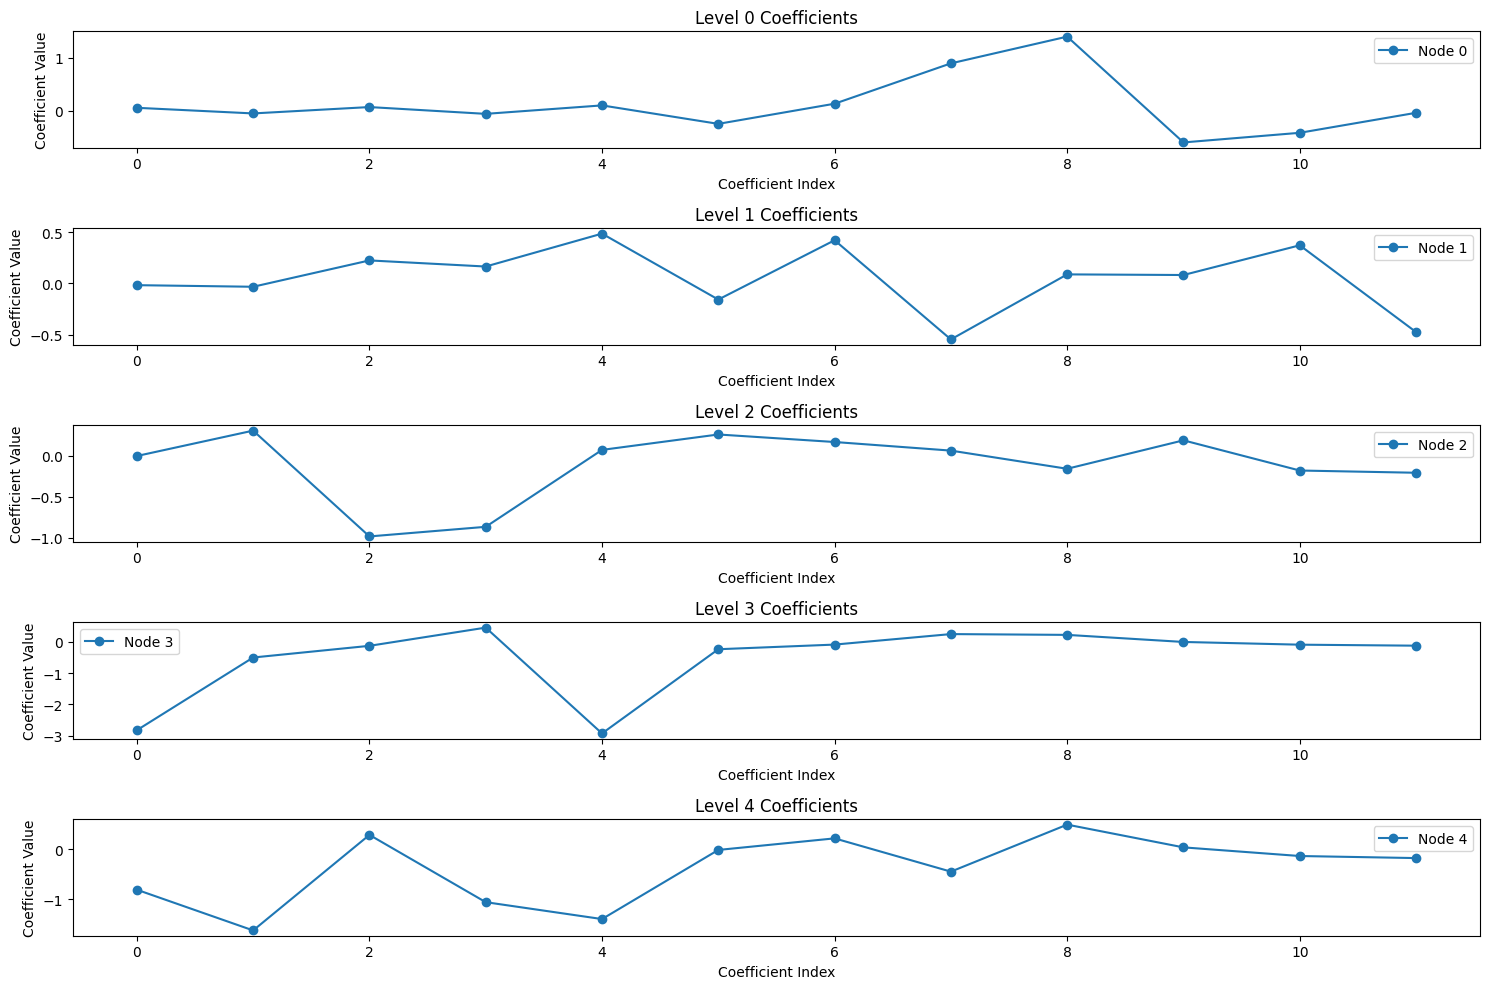

In [ ]:

# Perform wavelet packet decomposition
wp = pywt.WaveletPacket(data=dna_sequence, wavelet='db4', mode='symmetric', maxlevel=4)

# Extract coefficients at each level
node = [wp[node.path].data for node in wp.get_level(level=4, order='freq')]

# Plot the wavelet packet
plot_wavelet_packet(node, level=4)

[ 0.          0.          0.          0.0105974  -0.01915317 -0.1419395
  0.21593393  0.28097198 -1.48989327  0.45032205  2.66772448 -1.35177928
 -2.56841651  0.68747691  0.043343    0.66376378  0.043343    0.66376378
  0.043343    0.66376378  0.043343    0.66376378  0.043343    0.66376378
  0.043343    0.66376378  0.043343    0.66376378  0.043343    0.66376378
  0.043343    0.66376378  0.043343    0.66376378  0.043343    0.53332254
  0.57712774 -0.80988647  0.07227759  0.02541548 -1.22854181  0.27304224
 -1.22493268 -0.64622551  0.33805675 -0.23037781  0.          0.
  0.          0.        ]
[ 2.46084244e-03 -2.55371117e-03  1.23224337e-02  1.81694880e-01
 -1.37957859e+00  2.04010857e+00 -1.18949661e+00 -6.53347259e-01
 -4.76353330e-01 -4.11805634e-01 -4.38703739e-01 -4.38703739e-01
 -4.38703739e-01 -4.38703739e-01 -4.38703739e-01 -4.38703739e-01
 -4.38703739e-01 -4.08652972e-01  3.64659645e-01  6.19404582e-01
 -1.11085263e+00 -8.37142603e-01  7.48278905e-01 -1.87235526e-02
  1.56841

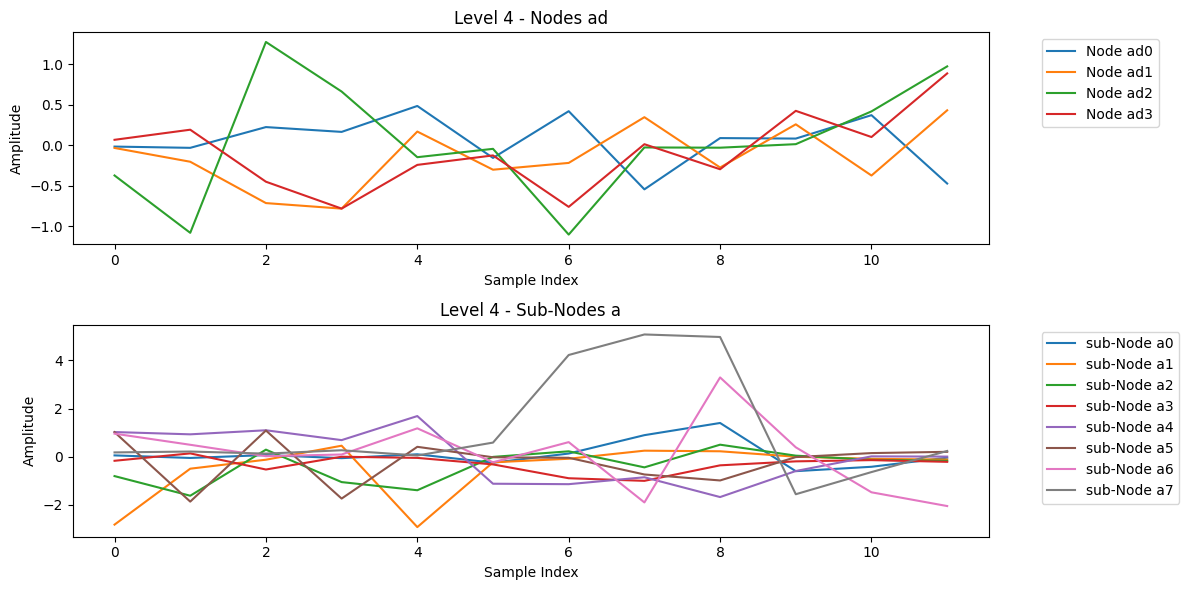

In [ ]:
print(wp['a'].data)
print(wp['ad'].data)
def plot_wavelet_packet_nodes(wp, level):
    nodes_ad = [node.data for node in wp.get_level(level, order='freq') if node.path.endswith('ad')]
    nodes_a = [node.data for node in wp.get_level(level, order='freq') if node.path.endswith('a')]

    plt.figure(figsize=(12, 6))

    # Plot 'ad' nodes
    plt.subplot(2, 1, 1)
    for i, node_ad in enumerate(nodes_ad):
        plt.plot(node_ad, label=f'Node ad{i}')

    plt.title(f'Level {level} - Nodes ad')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot 'a' nodes
    plt.subplot(2, 1, 2)
    for i, node_a in enumerate(nodes_a):
        plt.plot(node_a, label=f'sub-Node a{i}')

    plt.title(f'Level {level} - Sub-Nodes a')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
plot_wavelet_packet_nodes(wp, level=4)

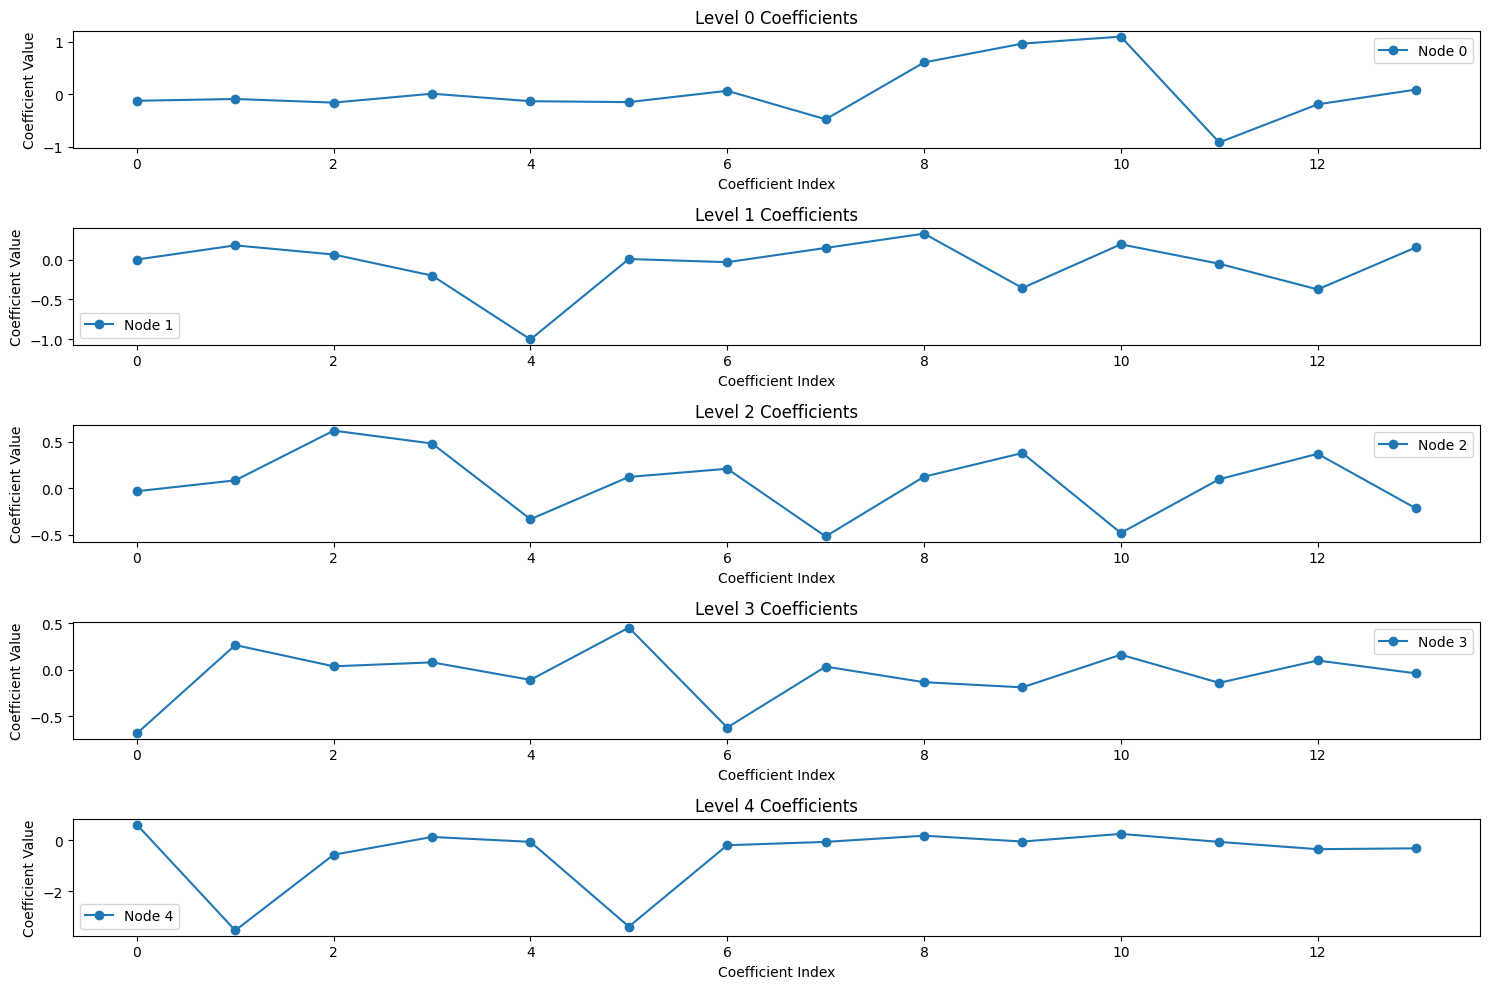

In [ ]:

# Perform wavelet packet decomposition
wp = pywt.WaveletPacket(data=dna_sequence, wavelet='db5', mode='symmetric', maxlevel=4)

# Extract coefficients at each level
node = [wp[node.path].data for node in wp.get_level(level=4, order='freq')]

# Plot the wavelet packet
plot_wavelet_packet(node, level=4)

Ejercicio sin librería

In [ ]:
def numeric_encode(short_read_line):
    mapping = {'G': -2, 'A': -1, 'T': 1, 'C': 2, 'N': 0}
    return [mapping.get(base, 0) for base in short_read_line]

def dna_decode(encoded_sequence):
    reverse_mapping = {-2: 'G', -1: 'A', 1: 'T', 2: 'C', 0: 'N'}
    return ''.join([reverse_mapping.get(code, 'N') for code in encoded_sequence])

# Original DNA sequence
dna_sequence = "CTTCCTATCT"

# Numeric encoding
numeric_encoded_sequence = numeric_encode(dna_sequence)

# Haar Wavelet Transform
c1 = [(a + b) / 2 for a, b in zip(numeric_encoded_sequence[0::2], numeric_encoded_sequence[1::2])]
c0 = [(a - b) / 2 for a, b in zip(numeric_encoded_sequence[0::2], numeric_encoded_sequence[1::2])]

# Inverse Haar Wavelet Transform with average operation for each pair
u0 = c0.copy()
u1 = [a + (b / 2) for a, b in zip(u0, c1)]

# Numeric to DNA sequence
decoded_dna_sequence = dna_decode(u1)

# Display the results
print("Original DNA Sequence:", dna_sequence)
print("Numeric Encoded Sequence:", numeric_encoded_sequence)
print("Haar Coefficients (c1):", c1)
print (c0)
print("Inverse Haar Transform (u1):", u1)
print (u0)
print("Decoded DNA Sequence:", decoded_dna_sequence)


Original DNA Sequence: CTTCCTATCT
Numeric Encoded Sequence: [2, 1, 1, 2, 2, 1, -1, 1, 2, 1]
Haar Coefficients (c1): [1.5, 1.5, 1.5, 0.0, 1.5]
[0.5, -0.5, 0.5, -1.0, 0.5]
Inverse Haar Transform (u1): [1.25, 0.25, 1.25, -1.0, 1.25]
[0.5, -0.5, 0.5, -1.0, 0.5]
Decoded DNA Sequence: NNNAN


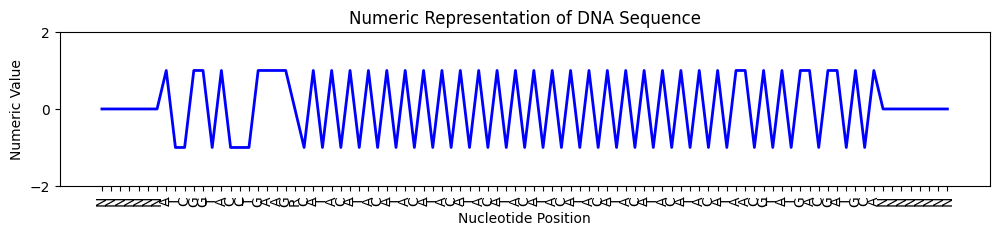

In [ ]:
def Walk_encode(short_read_line):
    mapping = {'G': 1, 'A': 1, 'T': -1, 'C': -1, 'N': 0}
    return [mapping.get(base, 0) for base in short_read_line]

# Example DNA sequence
sequence= 'NNNNNNNATCGGTACCTGAAGRCATACATACATACATACATACATACATACATACATACATACATACATAACGTATGACGATGCANNNNNNNN'
#two800_df_w.iloc[8,3]
Walk_dna = Walk_encode(sequence)

# Plot the numeric representation of the DNA sequence
plt.figure(figsize=(12, 2))
plt.plot(range(len(Walk_dna)), Walk_dna, color='blue', linewidth=2)
plt.yticks([-2, 0, 2])  # Set y-axis ticks to -2, 0, and 2
plt.xticks(range(len(Walk_dna)), sequence, rotation=90)
plt.title('Numeric Representation of DNA Sequence')
plt.xlabel('Nucleotide Position')
plt.ylabel('Numeric Value')
plt.show()

In [ ]:
#
import numpy as np
from scipy.signal import find_peaks

def spectral_repeat_finder(dna_sequence, threshold=4, window_length=10):
    # Step 2: Compute the power spectrum
    power_spectrum = np.abs(np.fft.fft(dna_sequence))**2
    spectral_average = np.mean(power_spectrum)

    # Step 3: Identify peaks in the power spectrum
    peaks, _ = find_peaks(power_spectrum, height=threshold * spectral_average)

    repeat_regions = []

    # Step 4: For each identified peak, compute Pm(j) in a sliding window
    for peak in peaks:
        start = max(0, peak - window_length // 2)
        end = min(len(dna_sequence), peak + window_length // 2)

        # Compute Pm(j)
        profile = power_spectrum[start:end] / spectral_average

        # Step 5: Identify repeat regions
        repeat_indices = np.where(profile > threshold)[0] + start
        repeat_regions.extend(repeat_indices)

    # Step 6: Identify repeat units (example: print the repeat regions)
    for repeat_start in repeat_regions:
        repeat_length = 1 / (peaks[peaks <= repeat_start][-1] + 1e-10)
        repeat_unit = dna_sequence[repeat_start:repeat_start + int(repeat_length)]
        print(f'Repeat Unit at position {repeat_start}')

spectral_repeat_finder(Walk_dna)
#https://webs.iiitd.edu.in/raghava/srf/

Repeat Unit at position 46
Repeat Unit at position 47


In [ ]:
result_df = pd.read_csv ('/content/drive/MyDrive/Tercer semestre/Proyecto DeepLearning/wavelet_group') #secuencias grandes

#Coding and Noncoding

**What can we learn with wavelets about DNA sequences**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [ ]:
# Read the content of the file
file_path = "/content/drive/MyDrive/Tercer semestre/Proyecto DeepLearning/Homo_sapiens_ENST00000379802_8_sequence.fa"

with open(file_path, "r") as file:
    file_content = file.read()

# Split the content into sequences and labels
sequences_and_labels = [entry.split("\n", 1) for entry in file_content.split(">")[1:]]


# Extract the labels and sequences
labels = [entry[0] for entry in sequences_and_labels]
sequences = [entry[1].replace("\n", "") for entry in sequences_and_labels]

# Count the number of letters in each sequence
letter_counts = [len(sequence) for sequence in sequences]

# Create a DataFrame
df = pd.DataFrame({
    'Label': labels,
    'Sequence': sequences,
    'Letter_Count': letter_counts
})

# Print the DataFrame
print(df)


                                                Label  \
0         DSP-201 ENSE00003916050 exon:protein_coding   
1         DSP-201 ENSE00001155370 exon:protein_coding   
2         DSP-201 ENSE00001155361 exon:protein_coding   
3         DSP-201 ENSE00001155357 exon:protein_coding   
4         DSP-201 ENSE00003488058 exon:protein_coding   
5         DSP-201 ENSE00003691486 exon:protein_coding   
6         DSP-201 ENSE00001155338 exon:protein_coding   
7         DSP-201 ENSE00001155330 exon:protein_coding   
8         DSP-201 ENSE00001155018 exon:protein_coding   
9         DSP-201 ENSE00001155013 exon:protein_coding   
10        DSP-201 ENSE00001155008 exon:protein_coding   
11        DSP-201 ENSE00001155002 exon:protein_coding   
12        DSP-201 ENSE00001154996 exon:protein_coding   
13        DSP-201 ENSE00001154992 exon:protein_coding   
14        DSP-201 ENSE00001154985 exon:protein_coding   
15        DSP-201 ENSE00001154981 exon:protein_coding   
16        DSP-201 ENSE000011549

In [ ]:
df.head()

Label  \
0  DSP-201 ENSE00003916050 exon:protein_coding   
1  DSP-201 ENSE00001155370 exon:protein_coding   
2  DSP-201 ENSE00001155361 exon:protein_coding   
3  DSP-201 ENSE00001155357 exon:protein_coding   
4  DSP-201 ENSE00003488058 exon:protein_coding   

                                            Sequence  Letter_Count  
0  CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...           415  
1  TCAAACCGGCACGATGTCCAGGCACCAGAACCAGAACACCATCCAG...           103  
2  GAATTGAAGTATGGAGATGGAATACAACTGACTCGGAGTCGAGAAT...           149  
3  GCTTCTTCAGCTCCAAGAGCAAATGCGAGCCCTTTATAAAGCCATC...           175  
4  GCGGAGATGGACATGGTGGCCTGGGGTGTGGACCTGGCCTCAGTGG...           129

In [ ]:
#DNA walk para representar purinas y pirimidinas
def GC_encode(short_read_line):
    mapping = {'G': 1, 'A': 1, 'T': -1, 'C': -1, 'N': 0}
    return [mapping.get(base, 0) for base in short_read_line]

# Apply GC_encode to the 'Sequence' column
df['GC_Encoded'] = df['Sequence'].apply(GC_encode)

# Print the updated DataFrame
print(df[['Label', 'GC_Encoded']])



                                                Label  \
0         DSP-201 ENSE00003916050 exon:protein_coding   
1         DSP-201 ENSE00001155370 exon:protein_coding   
2         DSP-201 ENSE00001155361 exon:protein_coding   
3         DSP-201 ENSE00001155357 exon:protein_coding   
4         DSP-201 ENSE00003488058 exon:protein_coding   
5         DSP-201 ENSE00003691486 exon:protein_coding   
6         DSP-201 ENSE00001155338 exon:protein_coding   
7         DSP-201 ENSE00001155330 exon:protein_coding   
8         DSP-201 ENSE00001155018 exon:protein_coding   
9         DSP-201 ENSE00001155013 exon:protein_coding   
10        DSP-201 ENSE00001155008 exon:protein_coding   
11        DSP-201 ENSE00001155002 exon:protein_coding   
12        DSP-201 ENSE00001154996 exon:protein_coding   
13        DSP-201 ENSE00001154992 exon:protein_coding   
14        DSP-201 ENSE00001154985 exon:protein_coding   
15        DSP-201 ENSE00001154981 exon:protein_coding   
16        DSP-201 ENSE000011549

In [ ]:

# Function to calculate GC ratio
def calculate_gc_ratio(sequence):
    nG = sequence.count('G')
    nC = sequence.count('C')
    nA = sequence.count('A')
    nT = sequence.count('T')

    # Avoid division by zero
    if nA + nG + nC + nT == 0:
        return 0

    gc_ratio = (nG + nC) / (nA + nG + nC + nT)
    return gc_ratio

# Apply the function to create a new 'GC_ratio' column
df['GC_ratio'] = df['Sequence'].apply(calculate_gc_ratio)


In [ ]:
df.head()

Label  \
0  DSP-201 ENSE00003916050 exon:protein_coding   
1  DSP-201 ENSE00001155370 exon:protein_coding   
2  DSP-201 ENSE00001155361 exon:protein_coding   
3  DSP-201 ENSE00001155357 exon:protein_coding   
4  DSP-201 ENSE00003488058 exon:protein_coding   

                                            Sequence  Letter_Count  \
0  CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...           415   
1  TCAAACCGGCACGATGTCCAGGCACCAGAACCAGAACACCATCCAG...           103   
2  GAATTGAAGTATGGAGATGGAATACAACTGACTCGGAGTCGAGAAT...           149   
3  GCTTCTTCAGCTCCAAGAGCAAATGCGAGCCCTTTATAAAGCCATC...           175   
4  GCGGAGATGGACATGGTGGCCTGGGGTGTGGACCTGGCCTCAGTGG...           129   

                                          GC_Encoded  GC_ratio  
0  [-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1,...  0.720482  
1  [-1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, ...  0.582524  
2  [1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1,...  0.483221  
3  [1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, ...  0.548571  
4  [1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1,...  0.604651

In [ ]:
# Assuming your DataFrame is named 'df'
df.to_csv('coding and noncoding.csv', index=False)

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Tercer semestre/Proyecto DeepLearning/coding and noncoding.csv')

In [9]:
df.head()

Label  \
0  DSP-201 ENSE00003916050 exon:protein_coding   
1  DSP-201 ENSE00001155370 exon:protein_coding   
2  DSP-201 ENSE00001155361 exon:protein_coding   
3  DSP-201 ENSE00001155357 exon:protein_coding   
4  DSP-201 ENSE00003488058 exon:protein_coding   

                                            Sequence  Letter_Count  \
0  CCTCTGCGCCCTTGCCGCCCTCCGAGCCACAGCTTTCCTCCCGCTC...           415   
1  TCAAACCGGCACGATGTCCAGGCACCAGAACCAGAACACCATCCAG...           103   
2  GAATTGAAGTATGGAGATGGAATACAACTGACTCGGAGTCGAGAAT...           149   
3  GCTTCTTCAGCTCCAAGAGCAAATGCGAGCCCTTTATAAAGCCATC...           175   
4  GCGGAGATGGACATGGTGGCCTGGGGTGTGGACCTGGCCTCAGTGG...           129   

                                          GC_Encoded  GC_ratio  
0  [-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1,...  0.720482  
1  [-1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, ...  0.582524  
2  [1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1,...  0.483221  
3  [1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, ...  0.548571  
4  [1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1,...  0.604651

In [10]:

# Find indices of the largest 5 Letter_Count values for sequences with labels containing "introns"
introns_indices = df[df['Label'].str.contains('intron')]['Letter_Count'].nlargest(5).index

# Find indices of the largest 5 Letter_Count values for sequences with labels containing "exons"
exons_indices = df[df['Label'].str.contains('exon')]['Letter_Count'].nlargest(5).index

# Print the results
print("Top 5 indices for sequences with labels containing 'introns':", introns_indices)
print("Top 5 indices for sequences with labels containing 'exons':", exons_indices)
#https://www.ensembl.org/Homo_sapiens/Transcript/Exons?g=ENSG00000096696;r=6:7541671-7586714;t=ENST00000379802
#https://www.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000096696;r=6:7541338-7586714;t=ENST00000379802
#https://www.ncbi.nlm.nih.gov/gene/1832

Top 5 indices for sequences with labels containing 'introns': Int64Index([24, 27, 25, 38, 29], dtype='int64')
Top 5 indices for sequences with labels containing 'exons': Int64Index([23, 22, 0, 14, 13], dtype='int64')


In [ ]:
introns_indices

Int64Index([24, 27, 25, 38, 29], dtype='int64')

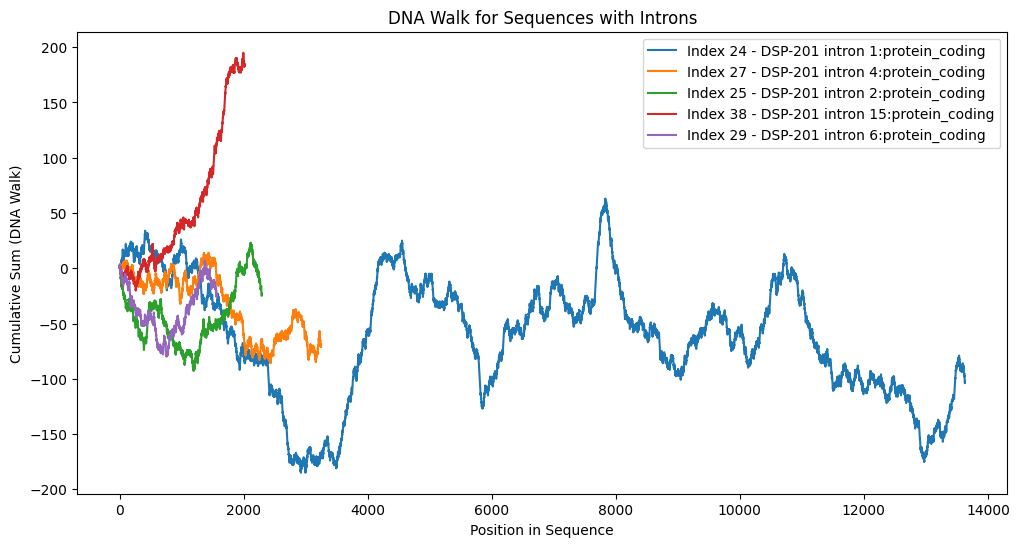

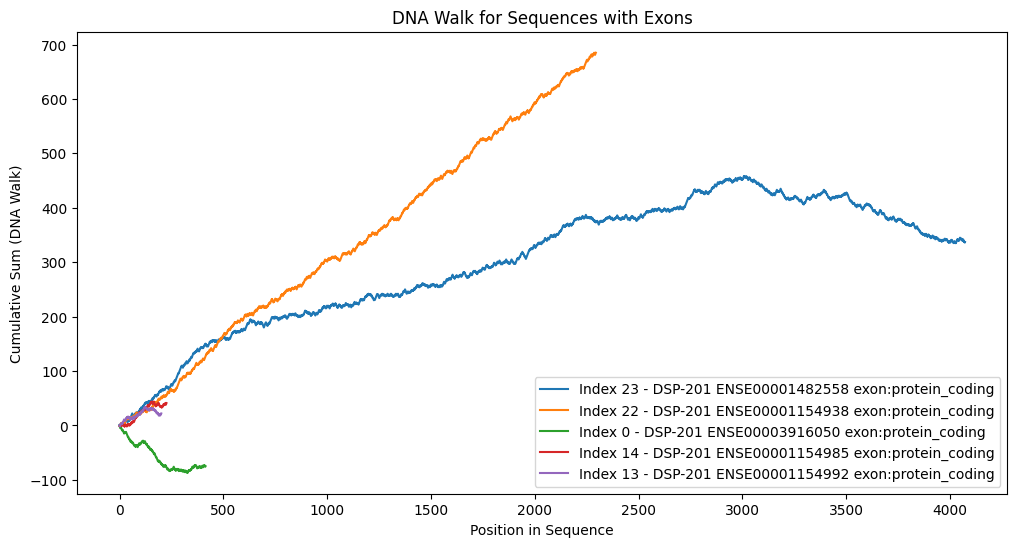

In [ ]:
# Plotting the DNA walk for sequences with 'introns'
plt.figure(figsize=(12, 6))
for index in introns_indices:
    sequence = df.loc[index, 'GC_Encoded']

    # Convert the string representation to a list of integers
    sequence_list = eval(sequence)

    # Convert the list to a numpy array
    sequence_numeric = np.array(sequence_list, dtype=int)

    dna_walk = np.cumsum(sequence_numeric)
    plt.plot(dna_walk, label=f'Index {index} - {df.loc[index, "Label"]}')

plt.title('DNA Walk for Sequences with Introns')
plt.xlabel('Position in Sequence')
plt.ylabel('Cumulative Sum (DNA Walk)')
plt.legend()
plt.show()

# Plotting the DNA walk for sequences with 'exons'
plt.figure(figsize=(12, 6))
for index in exons_indices:
    sequence = df.loc[index, 'GC_Encoded']

    # Convert the string representation to a list of integers
    sequence_list = eval(sequence)

    # Convert the list to a numpy array
    sequence_numeric = np.array(sequence_list, dtype=int)

    dna_walk = np.cumsum(sequence_numeric)
    plt.plot(dna_walk, label=f'Index {index} - {df.loc[index, "Label"]}')

plt.title('DNA Walk for Sequences with Exons')
plt.xlabel('Position in Sequence')
plt.ylabel('Cumulative Sum (DNA Walk)')
plt.legend()
plt.show()


The Wavelet Transform (WT) is a mathematical technique used for signal analysis and representation. In the context of DNA sequences encoded with GC content, the idea is to apply the WT to the binary sequence (GC_Encoded) to analyze its behavior at different scales.

The WT space–scale representation in 32 grey levels visualizes the coefficients of the wavelet transform at different positions and scales. The intensity of each pixel in the representation corresponds to the magnitude of the wavelet coefficients. Darker regions represent higher magnitudes, while lighter regions represent lower magnitudes.


Arneodo, A., d’Aubenton-Carafa, Y., Audit, B., Bacry, E., Muzy, J. F., & Thermes, C. (1998). What can we learn with wavelets about DNA sequences?. Physica A: Statistical Mechanics and its Applications, 249(1-4), 439-448.


Representaciones visuales de los wavelets con valores continuos

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


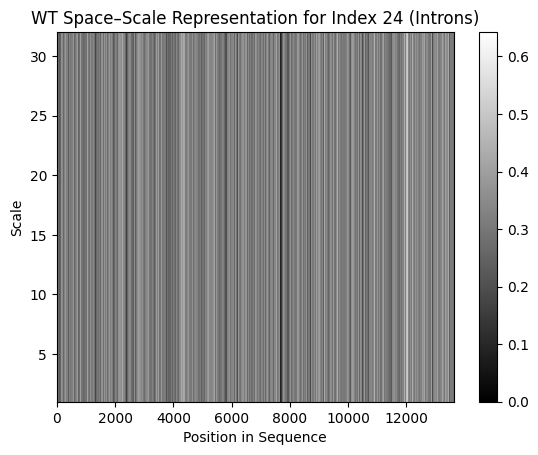

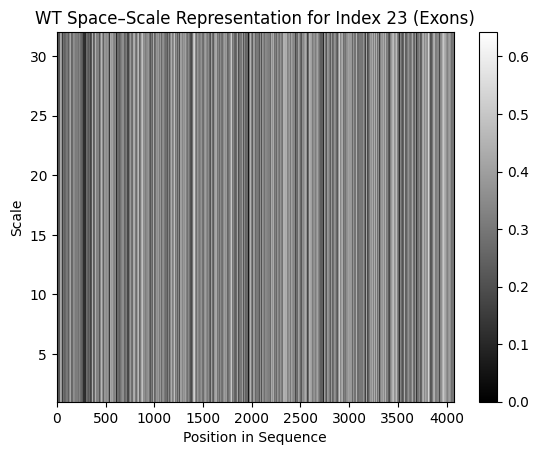

In [ ]:



# Function to compute the wavelet transform at a specific scale
def compute_wavelet_transform(data, scale):
    wavelet = 'cmor'  # Morlet wavelet
    return pywt.cwt(data, [scale], wavelet)[0]


# Plotting the WT space–scale representation for the first sequence with the largest Letter_Count in introns
for index in introns_indices:
    sequence = df.loc[index, 'GC_Encoded']
    scales = np.arange(1, len(sequence) + 1)  # Use scales up to the length of the sequence
    wavelet_transform = np.abs(compute_wavelet_transform(sequence, 1))  # Using scale 1 for simplicity
    plt.imshow(wavelet_transform, aspect='auto', cmap='gray', extent=[0, len(sequence), 1, 32])
    plt.title(f'WT Space–Scale Representation for Index {index} (Introns)')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar()
    plt.show()

# Plotting the WT space–scale representation for the first sequence with the largest Letter_Count in exons
for index in exons_indices:
    sequence = df.loc[index, 'GC_Encoded']
    scales = np.arange(1, len(sequence) + 1)  # Use scales up to the length of the sequence
    wavelet_transform = np.abs(compute_wavelet_transform(sequence, 1))  # Using scale 1 for simplicity
    plt.imshow(wavelet_transform, aspect='auto', cmap='gray', extent=[0, len(sequence), 1, 32])
    plt.title(f'WT Space–Scale Representation for Index {index} (Exons)')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar()
    plt.show()

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


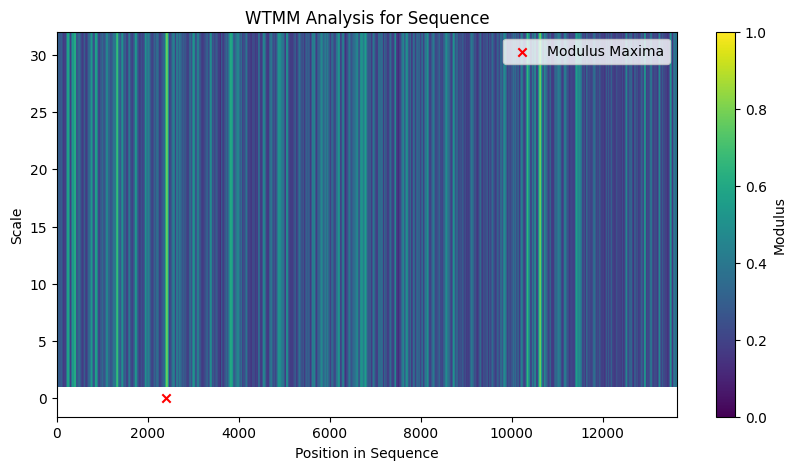

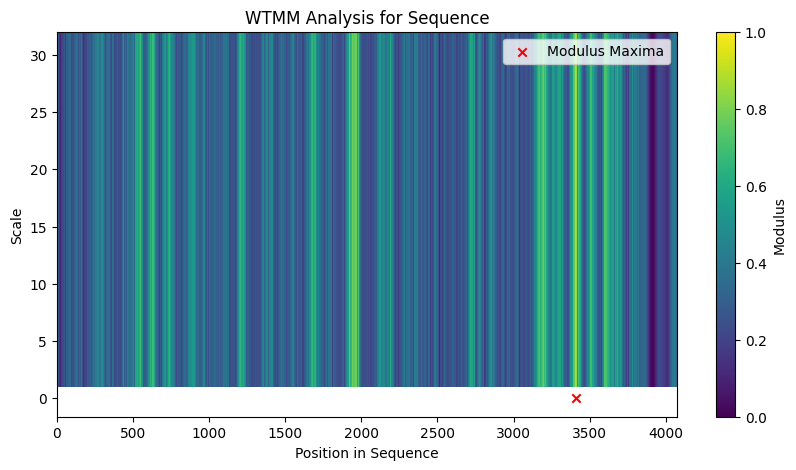

In [ ]:


# Function to compute the wavelet transform at a specific scale
def compute_wavelet_transform(data, scale):
    wavelet = 'cmor'  # Morlet wavelet
    return pywt.cwt(data, [scale], wavelet)[0]

# Function to find modulus maxima in the wavelet transform
def find_modulus_maxima(wavelet_transform):
    # Assuming a simple method to find maxima for illustration
    maxima = np.where(wavelet_transform == np.max(wavelet_transform))
    return maxima

# Function to plot the WTMM analysis
def plot_wtmm_analysis(sequence, scale):
    wavelet_transform = np.abs(compute_wavelet_transform(sequence, scale))
    maxima = find_modulus_maxima(wavelet_transform)

    plt.figure(figsize=(10, 5))
    plt.imshow(wavelet_transform, aspect='auto', cmap='viridis', extent=[0, len(sequence), 1, scale])
    plt.scatter(maxima[1], maxima[0], c='red', marker='x', label='Modulus Maxima')
    plt.title(f'WTMM Analysis for Sequence')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Scale')
    plt.colorbar(label='Modulus')
    plt.legend()
    plt.show()

# Applying WTMM analysis for introns
for index in introns_indices:
    sequence = df.loc[index, 'GC_Encoded']
    scale = 32  # Choose an appropriate scale
    plot_wtmm_analysis(sequence, scale)

# Applying WTMM analysis for exons
for index in exons_indices:
    sequence = df.loc[index, 'GC_Encoded']
    scale = 32  # Choose an appropriate scale
    plot_wtmm_analysis(sequence, scale)


In [ ]:

# Find indices of the largest 10 Letter_Count values for sequences with labels containing "introns"
introns_indices = df[df['Label'].str.contains('intron')]['Letter_Count'].nlargest(20).index

# Find indices of the largest 10 Letter_Count values for sequences with labels containing "exons"
exons_indices = df[df['Label'].str.contains('exon')]['Letter_Count'].nlargest(20).index


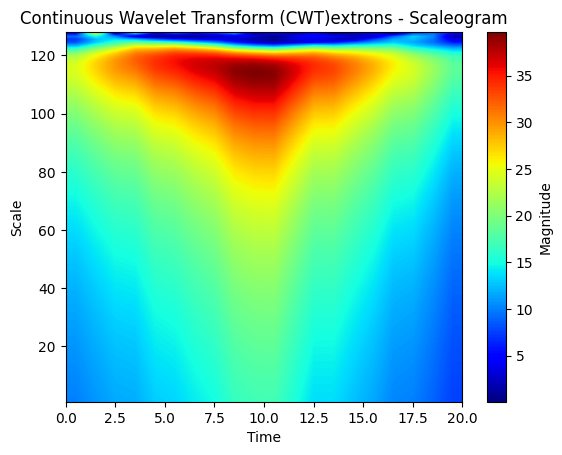

In [ ]:
#Weighill, D., Macaya-Sanz, D., DiFazio, S. P., Joubert, W., Shah, M., Schmutz, J., ... & Jacobson, D. (2019). Wavelet-based genomic signal processing for centromere identification and hypothesis generation. Frontiers in genetics, 10, 487.
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, ricker

sequence =exons_indices
# Choose an appropriate wavelet (e.g., Ricker wavelet)
wavelet_widths = np.arange(1, 128)
wavelet = ricker

# Compute the Continuous Wavelet Transform (CWT)
cwt_matrix = cwt(sequence, wavelet, wavelet_widths)

# Plot the scaleogram
plt.imshow(np.abs(cwt_matrix), aspect='auto', extent=[0, len(sequence), 1, 128], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT)extrons - Scaleogram')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()


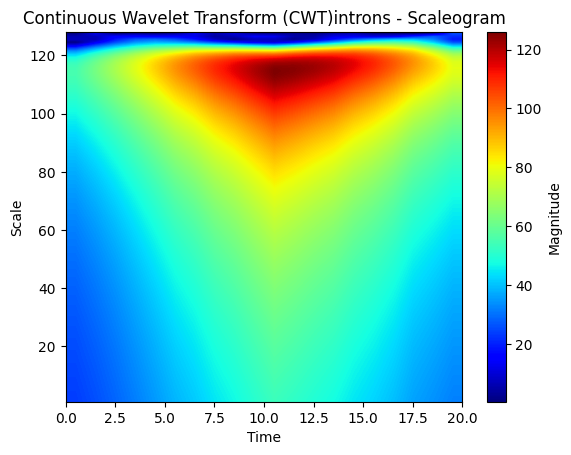

In [ ]:
sequence =introns_indices
# Choose an appropriate wavelet (e.g., Ricker wavelet)
wavelet_widths = np.arange(1, 128)
wavelet = ricker

# Compute the Continuous Wavelet Transform (CWT)
cwt_matrix = cwt(sequence, wavelet, wavelet_widths)

# Plot the scaleogram
plt.imshow(np.abs(cwt_matrix), aspect='auto', extent=[0, len(sequence), 1, 128], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT)introns - Scaleogram')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()
#https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

Continuous Wavelet Transform (CWT):

The CWT is a mathematical tool that decomposes a signal into its components at different scales. It uses a wavelet function to analyze the signal in both time and frequency domains simultaneously.
CWT is suitable for analyzing signals with non-stationary characteristics.
Modulus Maxima:

The modulus of the wavelet transform represents the amplitude of the transformed signal at each point.
Modulus maxima are points in the transformed signal where the amplitude is locally maximal. These points are crucial for identifying significant features in the signal.

WTMM Analysis Steps:

Wavelet Transform: Apply the CWT to the signal using a selected wavelet basis function.
Modulus Calculation: Compute the modulus of the resulting wavelet coefficients.
Local Maxima Identification: Locate points where the modulus reaches a local maximum. These points correspond to areas of interest in the signal with high energy or significant variations.


Purpose: The Welch method is a technique for estimating power spectral density (PSD) of a signal.
How it Works: It divides the signal into overlapping segments, computes the periodograms for each segment, and averages them to obtain a smoother and more reliable estimate of the PSD.
Application: Useful for analyzing the frequency content of a signal, identifying dominant frequencies, and detecting periodic patterns.
Ricker Wavelet (Mexican Hat Wavelet):

Purpose: The Ricker wavelet is a mathematical function often used in wavelet analysis and signal processing.
How it Works: It is defined as a Gaussian function modulated by a polynomial. The Ricker wavelet has a main lobe resembling a bell or a hat shape.
Application: Commonly used in the continuous wavelet transform (CWT) for analyzing signals in both time and frequency domains. It is particularly effective in capturing and representing transient features in a signal.